#Beginner Track: Food Deserts in the United States

###Team Members: Siddharth Saravanan, Harshith Maddala, Aniruddh Rajagopal



This project explores the distribution, severity, and key socio-economic drivers of food deserts in the United States using the USDA's Food Research Atlas and Food Environment Atlas datasets. Through in-depth data analysis, visualization, and machine learning models, we identify high-risk regions and propose actionable solutions for improving food accessibility and reducing nutritional inequality.

In [38]:
from google.colab import drive
drive.mount('/content/drive')  # Mount the drive
print('Drive mounted successfully.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted successfully.


## Importing necessary libraries and loading the dataset

In [39]:
import pandas as pd
filepath='/content/drive/MyDrive/Datathon/FoodAccessResearchAtlasData2019.csv'

In [40]:
food_research_atlas=pd.read_csv(filepath)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Setting visualization styles

In [42]:
plt.style.use('ggplot')
sns.set(font_scale=1.2)

## Exploring the dataset

In [43]:
print(f"Dataset shape: {food_research_atlas.shape}")
food_research_atlas.head()

Dataset shape: (72531, 147)


,CensusTract,State,County,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
0,1001020100,Alabama,Autauga County,1,1912,693,0,0.0,0.00,0,...,221.0,1622.0,217.0,14.0,0.0,14.0,45.0,44.0,6.0,102.0
1,1001020200,Alabama,Autauga County,1,2170,743,0,181.0,8.34,1,...,214.0,888.0,1217.0,5.0,0.0,5.0,55.0,75.0,89.0,156.0
2,1001020300,Alabama,Autauga County,1,3373,1256,0,0.0,0.00,0,...,439.0,2576.0,647.0,17.0,5.0,11.0,117.0,87.0,99.0,172.0
3,1001020400,Alabama,Autauga County,1,4386,1722,0,0.0,0.00,0,...,904.0,4086.0,193.0,18.0,4.0,11.0,74.0,85.0,21.0,98.0
4,1001020500,Alabama,Autauga County,1,10766,4082,0,181.0,1.68,0,...,1126.0,8666.0,1437.0,296.0,9.0,48.0,310.0,355.0,230.0,339.0


In [44]:
print("Column names:")
print(food_research_atlas.columns.tolist())

Column names:
['CensusTract', 'State', 'County', 'Urban', 'Pop2010', 'OHU2010', 'GroupQuartersFlag', 'NUMGQTRS', 'PCTGQTRS', 'LILATracts_1And10', 'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle', 'HUNVFlag', 'LowIncomeTracts', 'PovertyRate', 'MedianFamilyIncome', 'LA1and10', 'LAhalfand10', 'LA1and20', 'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20', 'LATractsVehicle_20', 'LAPOP1_10', 'LAPOP05_10', 'LAPOP1_20', 'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20', 'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare', 'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare', 'lawhitehalf', 'lawhitehalfshare', 'lablackhalf', 'lablackhalfshare', 'laasianhalf', 'laasianhalfshare', 'lanhopihalf', 'lanhopihalfshare', 'laaianhalf', 'laaianhalfshare', 'laomultirhalf', 'laomultirhalfshare', 'lahisphalf', 'lahisphalfshare', 'lahunvhalf', 'lahunvhalfshare', 'lasnaphalf', 'lasnaphalfshare', 'lapop1', 'lapop1share', 'lalowi1', 'lalowi1share', 'lakids1', 'lakids

In [45]:
missing_values = food_research_atlas.isnull().sum()
print("\nColumns with missing values:")
print(missing_values[missing_values > 0])


Columns with missing values:
NUMGQTRS                 25
PCTGQTRS                 25
PovertyRate               3
MedianFamilyIncome      748
LAPOP1_10             29957
                      ...  
TractAIAN                 4
TractOMultir              4
TractHispanic             4
TractHUNV                 4
TractSNAP                 4
Length: 126, dtype: int64


In [46]:
print("\nData types:")
print(food_research_atlas.dtypes)


Data types:
CensusTract        int64
State             object
County            object
Urban              int64
Pop2010            int64
                  ...   
TractAIAN        float64
TractOMultir     float64
TractHispanic    float64
TractHUNV        float64
TractSNAP        float64
Length: 147, dtype: object


In [47]:
print("\nSummary statistics:")
food_research_atlas.describe()


Summary statistics:


,CensusTract,Urban,Pop2010,OHU2010,GroupQuartersFlag,NUMGQTRS,PCTGQTRS,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,...,TractSeniors,TractWhite,TractBlack,TractAsian,TractNHOPI,TractAIAN,TractOMultir,TractHispanic,TractHUNV,TractSNAP
count,7.253100e+04,72531.000000,72531.000000,72531.000000,72531.000000,72506.000000,72506.000000,72531.000000,72531.000000,72531.000000,...,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000,72527.000000
mean,2.782573e+10,0.760626,4256.739022,1609.191821,0.007114,110.121549,2.708677,0.128125,0.279150,0.112228,...,555.197113,3082.337157,536.756160,202.327685,7.445655,40.152316,387.664649,695.979277,143.709736,201.753182
std,1.581647e+10,0.426704,1955.987626,725.676046,0.084046,443.931753,9.570875,0.334231,0.448584,0.315649,...,351.805391,1796.364560,889.118109,435.878339,45.186581,177.378696,529.349680,1119.472739,232.738869,185.760089
min,1.001020e+09,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.212708e+10,1.000000,2899.000000,1108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,320.000000,1848.000000,43.000000,17.000000,0.000000,7.000000,85.000000,88.000000,36.000000,67.000000
50%,2.712979e+10,1.000000,4011.000000,1525.000000,0.000000,7.000000,0.180000,0.000000,0.000000,0.000000,...,497.000000,2914.000000,160.000000,58.000000,1.000000,15.000000,186.000000,243.000000,82.000000,152.000000
75%,4.103900e+10,1.000000,5330.500000,2021.000000,0.000000,64.000000,1.570000,0.000000,1.000000,0.000000,...,718.000000,4118.000000,610.000000,189.000000,5.000000,33.000000,448.000000,751.000000,168.500000,282.000000
max,5.604595e+10,1.000000,37452.000000,16043.000000,1.000000,19496.000000,100.000000,1.000000,1.000000,1.000000,...,17271.000000,28983.000000,16804.000000,10485.000000,3491.000000,9009.000000,8839.000000,15420.000000,6059.000000,2175.000000


## Describing each feature

In [48]:
feature_descriptions = {
    # Basic Geographic & Demographic Identifiers
    'CensusTract': 'Census Tract ID',
    'State': 'State',
    'County': 'County',
    'Urban': 'Urban Area (1=Yes, 0=No)',
    'Pop2010': 'Total Population (2010)',
    'OHU2010': 'Occupied Housing Units (2010)',

    # Group Quarters Information
    'GroupQuartersFlag': 'Has Group Quarters',
    'NUMGQTRS': 'Number of People in Group Quarters',
    'PCTGQTRS': 'Percent of Population in Group Quarters',

    # Food Desert Indicators
    'LILATracts_1And10': 'Low Income & Low Access (1mi Urban/10mi Rural)',
    'LILATracts_halfAnd10': 'Low Income & Low Access (0.5mi Urban/10mi Rural)',
    'LILATracts_1And20': 'Low Income & Low Access (1mi Urban/20mi Rural)',
    'LILATracts_Vehicle': 'Low Income & Low Access (20mi) & Low Vehicle Access',
    'HUNVFlag': 'High Housing Unit Vacancy Flag',
    'LowIncomeTracts': 'Low Income Tract',

    # Socioeconomic Indicators
    'PovertyRate': 'Poverty Rate (%)',
    'MedianFamilyIncome': 'Median Family Income ($)',

    # Low Access Indicators
    'LA1and10': 'Low Access (1mi Urban/10mi Rural)',
    'LAhalfand10': 'Low Access (0.5mi Urban/10mi Rural)',
    'LA1and20': 'Low Access (1mi Urban/20mi Rural)',
    'LATracts_half': 'Low Access Tract (0.5mi)',
    'LATracts1': 'Low Access Tract (1mi)',
    'LATracts10': 'Low Access Tract (10mi)',
    'LATracts20': 'Low Access Tract (20mi)',
    'LATractsVehicle_20': 'Low Access Tract (20mi) & Low Vehicle Access',

    # Population metrics
    'LAPOP1_10': 'Population with Low Access (1mi/10mi)',
    'LAPOP05_10': 'Population with Low Access (0.5mi/10mi)',
    'LAPOP1_20': 'Population with Low Access (1mi/20mi)',
    'LALOWI1_10': 'Low Income Population with Low Access (1mi/10mi)',
    'LALOWI05_10': 'Low Income Population with Low Access (0.5mi/10mi)',
    'LALOWI1_20': 'Low Income Population with Low Access (1mi/20mi)',

    # Population with low access at 0.5 miles
    'lapophalf': 'Population with Low Access (0.5mi)',
    'lapophalfshare': 'Share of Population with Low Access (0.5mi)',
    'lalowihalf': 'Low Income Population with Low Access (0.5mi)',
    'lalowihalfshare': 'Share of Low Income Population with Low Access (0.5mi)',
    'lakidshalf': 'Children with Low Access (0.5mi)',
    'lakidshalfshare': 'Share of Children with Low Access (0.5mi)',
    'laseniorshalf': 'Seniors with Low Access (0.5mi)',
    'laseniorshalfshare': 'Share of Seniors with Low Access (0.5mi)',
    'lawhitehalf': 'White Population with Low Access (0.5mi)',
    'lawhitehalfshare': 'Share of White Population with Low Access (0.5mi)',
    'lablackhalf': 'Black Population with Low Access (0.5mi)',
    'lablackhalfshare': 'Share of Black Population with Low Access (0.5mi)',
    'laasianhalf': 'Asian Population with Low Access (0.5mi)',
    'laasianhalfshare': 'Share of Asian Population with Low Access (0.5mi)',
    'lanhopihalf': 'Native Hawaiian/PI with Low Access (0.5mi)',
    'lanhopihalfshare': 'Share of Native Hawaiian/PI with Low Access (0.5mi)',
    'laaianhalf': 'American Indian/AN with Low Access (0.5mi)',
    'laaianhalfshare': 'Share of American Indian/AN with Low Access (0.5mi)',
    'laomultirhalf': 'Multiple Race Population with Low Access (0.5mi)',
    'laomultirhalfshare': 'Share of Multiple Race with Low Access (0.5mi)',
    'lahisphalf': 'Hispanic Population with Low Access (0.5mi)',
    'lahisphalfshare': 'Share of Hispanic Population with Low Access (0.5mi)',
    'lahunvhalf': 'Households without Vehicle with Low Access (0.5mi)',
    'lahunvhalfshare': 'Share of Households without Vehicle with Low Access (0.5mi)',
    'lasnaphalf': 'SNAP Households with Low Access (0.5mi)',
    'lasnaphalfshare': 'Share of SNAP Households with Low Access (0.5mi)',

    # Demographic counts for the tract
    'TractLOWI': 'Low Income Population in Tract',
    'TractKids': 'Children in Tract',
    'TractSeniors': 'Seniors in Tract',
    'TractWhite': 'White Population in Tract',
    'TractBlack': 'Black Population in Tract',
    'TractAsian': 'Asian Population in Tract',
    'TractNHOPI': 'Native Hawaiian/PI Population in Tract',
    'TractAIAN': 'American Indian/AN Population in Tract',
    'TractOMultir': 'Multiple Race Population in Tract',
    'TractHispanic': 'Hispanic Population in Tract',
    'TractHUNV': 'Households without Vehicle in Tract',
    'TractSNAP': 'SNAP Households in Tract',

    # Custom fields
    'is_food_desert': 'Food Desert Status',
    'food_desert_severity': 'Food Desert Severity Score'
}

## Understanding Food Desert Indicators

In [49]:
primary_indicators = [
    "LILATracts_1And10", "LILATracts_halfAnd10", "LILATracts_1And20",
    "LILATracts_Vehicle", "LowIncomeTracts"
]

low_access_indicators = [
    "LATracts_half", "LATracts1", "LATracts10", "LATracts20",
    "LATractsVehicle_20", "LA1and10", "LAhalfand10", "LA1and20"
]

population_access_indicators = [
    "LAPOP1_10", "LAPOP05_10", "LAPOP1_20",
    "LALOWI1_10", "LALOWI05_10", "LALOWI1_20"
]

##Frequency of Primary food desert indicators

In [50]:
print("Primary Food Desert Indicators:")
for indicator in primary_indicators:
    if indicator in food_research_atlas.columns:
        print(f"\nFrequency of {indicator}:")
        print(food_research_atlas[indicator].value_counts())

Primary Food Desert Indicators:

Frequency of LILATracts_1And10:
LILATracts_1And10
0    63238
1     9293
Name: count, dtype: int64

Frequency of LILATracts_halfAnd10:
LILATracts_halfAnd10
0    52284
1    20247
Name: count, dtype: int64

Frequency of LILATracts_1And20:
LILATracts_1And20
0    64391
1     8140
Name: count, dtype: int64

Frequency of LILATracts_Vehicle:
LILATracts_Vehicle
0    62405
1    10126
Name: count, dtype: int64

Frequency of LowIncomeTracts:
LowIncomeTracts
0    42244
1    30287
Name: count, dtype: int64


In [51]:
print("\nLow Access Indicators:")
for indicator in low_access_indicators:
    if indicator in food_research_atlas.columns:
        print(f"\nFrequency of {indicator}:")
        print(food_research_atlas[indicator].value_counts())


Low Access Indicators:

Frequency of LATracts_half:
LATracts_half
1    46335
0    26196
Name: count, dtype: int64

Frequency of LATracts1:
LATracts1
0    48169
1    24362
Name: count, dtype: int64

Frequency of LATracts10:
LATracts10
0    69345
1     3186
Name: count, dtype: int64

Frequency of LATracts20:
LATracts20
0    72184
1      347
Name: count, dtype: int64

Frequency of LATractsVehicle_20:
LATractsVehicle_20
0    56955
1    15576
Name: count, dtype: int64

Frequency of LA1and10:
LA1and10
0    44983
1    27548
Name: count, dtype: int64

Frequency of LAhalfand10:
LAhalfand10
1    49521
0    23010
Name: count, dtype: int64

Frequency of LA1and20:
LA1and20
0    47822
1    24709
Name: count, dtype: int64


##Population Access Indicators (Summary Statistics)

In [52]:
print("\nPopulation Access Indicators (Summary Statistics):")
for indicator in population_access_indicators:
    if indicator in food_research_atlas.columns:
        print(f"\nSummary of {indicator}:")
        print(food_research_atlas[indicator].describe())


Population Access Indicators (Summary Statistics):

Summary of LAPOP1_10:
count    42574.000000
mean      1611.579790
std       1778.312589
min          0.000000
25%        223.000000
50%       1024.000000
75%       2456.000000
max      27227.000000
Name: LAPOP1_10, dtype: float64

Summary of LAPOP05_10:
count    57991.000000
mean      2657.206946
std       2044.331313
min          0.000000
25%       1083.000000
50%       2387.000000
75%       3827.000000
max      32582.000000
Name: LAPOP05_10, dtype: float64

Summary of LAPOP1_20:
count    36617.000000
mean      1750.446842
std       1847.315588
min          0.000000
25%        271.000000
50%       1186.000000
75%       2704.000000
max      27227.000000
Name: LAPOP1_20, dtype: float64

Summary of LALOWI1_10:
count    42574.000000
mean       442.383450
std        589.412971
min          0.000000
25%         49.000000
50%        228.000000
75%        605.000000
max       9402.000000
Name: LALOWI1_10, dtype: float64

Summary of LALOWI05

##Exploring Low Income and Low Access Tracts

In [53]:
# Understanding LILA (Low Income, Low Access) Tracts
# LILATracts_1And10: Low-income and low access tract measured 1 mile for urban areas and 10 miles for rural areas
# LILATracts_halfAnd10: Low-income and low access tract measured 1/2 mile for urban areas and 10 miles for rural areas
# LILATracts_1And20: Low-income and low access tract measured 1 mile for urban areas and 20 miles for rural areas
# LILATracts_Vehicle: Low-income and low access tract measured 20 miles and low vehicle access

# Count of tracts by urban/rural classification
urban_rural_count = food_research_atlas['Urban'].value_counts()
print("Urban vs Rural Tracts:")
print(urban_rural_count)
print(f"Percentage: {urban_rural_count / len(food_research_atlas) * 100}")

Urban vs Rural Tracts:
Urban
1    55169
0    17362
Name: count, dtype: int64
Percentage: Urban
1    76.062649
0    23.937351
Name: count, dtype: float64


##Analyzing the Distribution of food desert severity

######This section introduces a food desert severity score that was developed through a synthesis of multiple indicators from the USDA's Food Access Research Atlas. Instead of treating food desert status as a simple binary categorization, this includes recognition that challenges with food access can present themselves in a gradation of severity. The severity score integrates 9 different food desert indicators, including distance thresholds (0.5, 1, 10, and 20 miles), demographic vulnerabilities (low-income status), and transportation constraints (access to vehicle). Each of the 9 indicators is coded in binary and is then summed into a single composite score that ranges from 0 (no food access challenge) to 9 (severe, multidimensional food access issue).The aggregated distribution of severity scores presents a more nuanced assessment of food access problems throughout the United States than a simplistic food desert/no food desert distinction. The descriptive visualization displays how many census tracts are incrementally affected by different levels of food access severity which, at the very least, can assist in identifying not just where food deserts are, but where double, triple, or more food access barriers overlap The multi-dimensional and cumulative process of developing the food access severity score supports policy mechanisms that are better targeted, proportional, and considerate to the severity and specific nature of food access barriers in different communities.

In [54]:
# Create a comprehensive food desert severity score
severity_columns = [
    'LILATracts_1And10', 'LILATracts_halfAnd10', 'LILATracts_1And20', 'LILATracts_Vehicle',
    'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20', 'LATractsVehicle_20'
]

In [55]:
valid_severity_columns = [col for col in severity_columns if col in food_research_atlas.columns]

In [56]:
food_research_atlas['food_desert_severity'] = food_research_atlas[valid_severity_columns].sum(axis=1)


Food Desert Severity Distribution:
food_desert_severity
2    23321
0    20417
1    12604
7     4540
3     3891
5     3881
4     3877
Name: count, dtype: int64


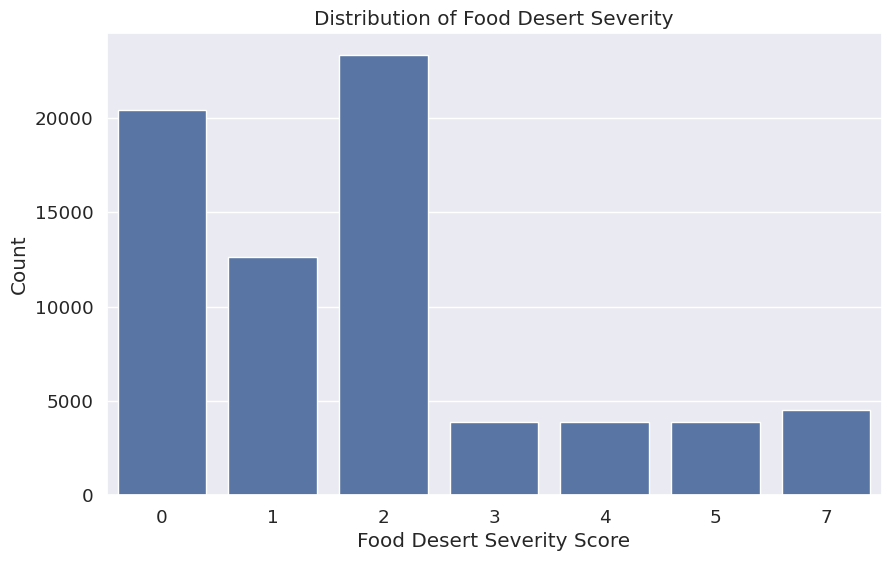

In [57]:
# Distribution of food desert severity
print("\nFood Desert Severity Distribution:")
print(food_research_atlas['food_desert_severity'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(x='food_desert_severity', data=food_research_atlas)
plt.title('Distribution of Food Desert Severity')
plt.xlabel('Food Desert Severity Score')
plt.ylabel('Count')
plt.show()

##Analyzing and Plotting the same plot of Distribution of Food Severity by Region

#####This visualization analyzes how food desert severity differs in various geographic regions of the United States. By grouping states into five geographic regions (Northeast, Southeast, Midwest, Southwest, and West), we can capture macro-level food access challenges that cross state boundaries and identify larger regional patterns that occur across the five regions. The stacked bar chart shows food desert severity scores in each region, with fill patterns to depict severity levels. This is not only a way to show the total number of food desert tracts for each region, but also illustrates where and how the severity is distributed in each region. This type of visualization can help to highlight regional differences and similarities in food access challenges. For example, one could assess whether Southeastern states are likely to face somewhat more severe food deserts than Northeastern states or whether the Southwest has a different pattern of food access challenges than the Midwest. It is likely that regional differences in socioeconomic conditions, settlement patterns, transportation systems, and food retail environments are reflected in these patterns. This becomes critical when developing federal approaches to program design and advocacy in partnership at multi-state levels to address the food access challenges that are specific to various regions in the United States.

In [58]:
# Create regional groupings for states
region_mapping = {
    # Northeast
    'Connecticut': 'Northeast', 'Maine': 'Northeast', 'Massachusetts': 'Northeast',
    'New Hampshire': 'Northeast', 'New Jersey': 'Northeast', 'New York': 'Northeast',
    'Pennsylvania': 'Northeast', 'Rhode Island': 'Northeast', 'Vermont': 'Northeast',

    # Southeast
    'Alabama': 'Southeast', 'Arkansas': 'Southeast', 'Delaware': 'Southeast',
    'Florida': 'Southeast', 'Georgia': 'Southeast', 'Kentucky': 'Southeast',
    'Louisiana': 'Southeast', 'Maryland': 'Southeast', 'Mississippi': 'Southeast',
    'North Carolina': 'Southeast', 'South Carolina': 'Southeast', 'Tennessee': 'Southeast',
    'Virginia': 'Southeast', 'West Virginia': 'Southeast', 'District of Columbia': 'Southeast',

    # Midwest
    'Illinois': 'Midwest', 'Indiana': 'Midwest', 'Iowa': 'Midwest',
    'Kansas': 'Midwest', 'Michigan': 'Midwest', 'Minnesota': 'Midwest',
    'Missouri': 'Midwest', 'Nebraska': 'Midwest', 'North Dakota': 'Midwest',
    'Ohio': 'Midwest', 'South Dakota': 'Midwest', 'Wisconsin': 'Midwest',

    # Southwest
    'Arizona': 'Southwest', 'New Mexico': 'Southwest', 'Oklahoma': 'Southwest',
    'Texas': 'Southwest',

    # West
    'Alaska': 'West', 'California': 'West', 'Colorado': 'West',
    'Hawaii': 'West', 'Idaho': 'West', 'Montana': 'West',
    'Nevada': 'West', 'Oregon': 'West', 'Utah': 'West',
    'Washington': 'West', 'Wyoming': 'West'
}

# Add region to the dataframe
food_research_atlas['Region'] = food_research_atlas['State'].map(region_mapping)

<Figure size 600x400 with 0 Axes>

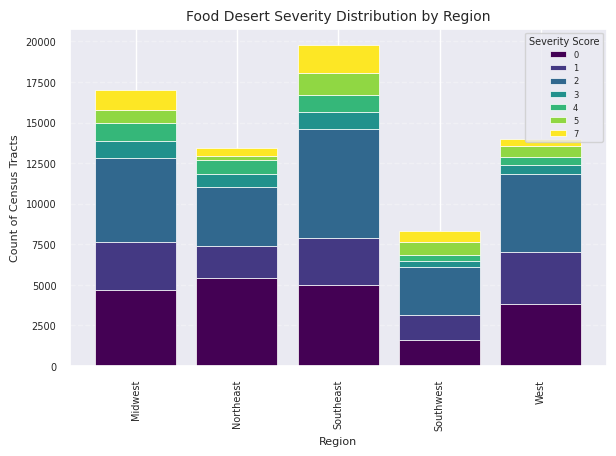

In [59]:
plt.figure(figsize=(6, 4), dpi=100)

# Create pivot table with regions as columns and severity scores as values
severity_by_region = food_research_atlas.groupby(['Region', 'food_desert_severity']).size().unstack()

# Plot stacked bar chart
severity_by_region.plot(
    kind='bar',
    stacked=True,
    colormap='viridis',
    width=0.8,
    edgecolor='white',
    linewidth=0.5
)

plt.title('Food Desert Severity Distribution by Region', fontsize=10)
plt.xlabel('Region', fontsize=8)
plt.ylabel('Count of Census Tracts', fontsize=8)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)


plt.legend(
    title='Severity Score',
    fontsize=6,
    title_fontsize=7,
    loc='upper right',
    bbox_to_anchor=(1, 1),
    frameon=True
)

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()

plt.show()

##Analyzing Demographic factors with food desert status

In [60]:
demographic_factors = [
    'PovertyRate', 'MedianFamilyIncome', 'TractLOWI', 'TractKids',
    'TractSeniors', 'TractHUNV', 'TractSNAP'
]

In [61]:
food_research_atlas['is_food_desert'] = food_research_atlas['LILATracts_1And10'].apply(lambda x: 1 if x == 1 else 0)

###Correlation between Demographic factors and food desert status

In [62]:
# Calculate correlation with food desert status
correlation_matrix = food_research_atlas[['is_food_desert'] + demographic_factors].corr()
print("\nCorrelation with Food Desert Status:")
print(correlation_matrix['is_food_desert'].sort_values(ascending=False))


Correlation with Food Desert Status:
is_food_desert        1.000000
PovertyRate           0.297009
TractSNAP             0.245726
TractLOWI             0.243792
TractKids             0.021294
TractHUNV             0.012573
TractSeniors         -0.025128
MedianFamilyIncome   -0.286697
Name: is_food_desert, dtype: float64


## Demographic Factor Distribution Analysis
#####This section of the report, the histogram visualizations of the demographic factors enable comparisons to be drawn between food deserts, with concentrations of poverty, and non-food deserts that have no concentrations of poverty. For each demographic variable (income levels, racial makeup, age groups, vehicle ownership, and SNAP participation) the code generates comparative histogram visualizations with statistical annotations. Graphical visualizations are produced as overlapping histograms, overlaying the two frequency distributions in different color regions, along with vertical dashed lines to demonstrate the mean value for each category of food desert status. This vertical mean lines show the visual differences between food desert cohorts for average values, but the histograms demonstrate statistics on all distribution. Each plot also demonstrates with Welch's t-test (which accounts for unequal means) if the observed difference is statistically significant, and for the reader, let's further observe whether and to what extent each three factors correlate with food desert versus non-food desert status. This provides descriptive information observing mean differences for each cohort (ex. mean income is X for Food Desert status vs Y for non-Food Desert status) and explore whether interventions might be necessary to mitigate other factors in association with food deserts. These visualizations allow for initial observations to be made about each demographic factor examined, and invite comparisons that highlight the factors with the greatest distinctions (and potential methodological need) between food desert and non-food desert communities. The intention of the justifications presented is not meant to be exhaustive, but rather, which clearly demonstrates the challenges faced when considering socio-economic and demographic contexts of food insecurity on an individual and community-based basis. Interventions should be designed with regard to some modification of schools, so that the intervention(s) would not consider changing this approach just to reapply to a different socio-economic and demographic context of others without consideration of context.


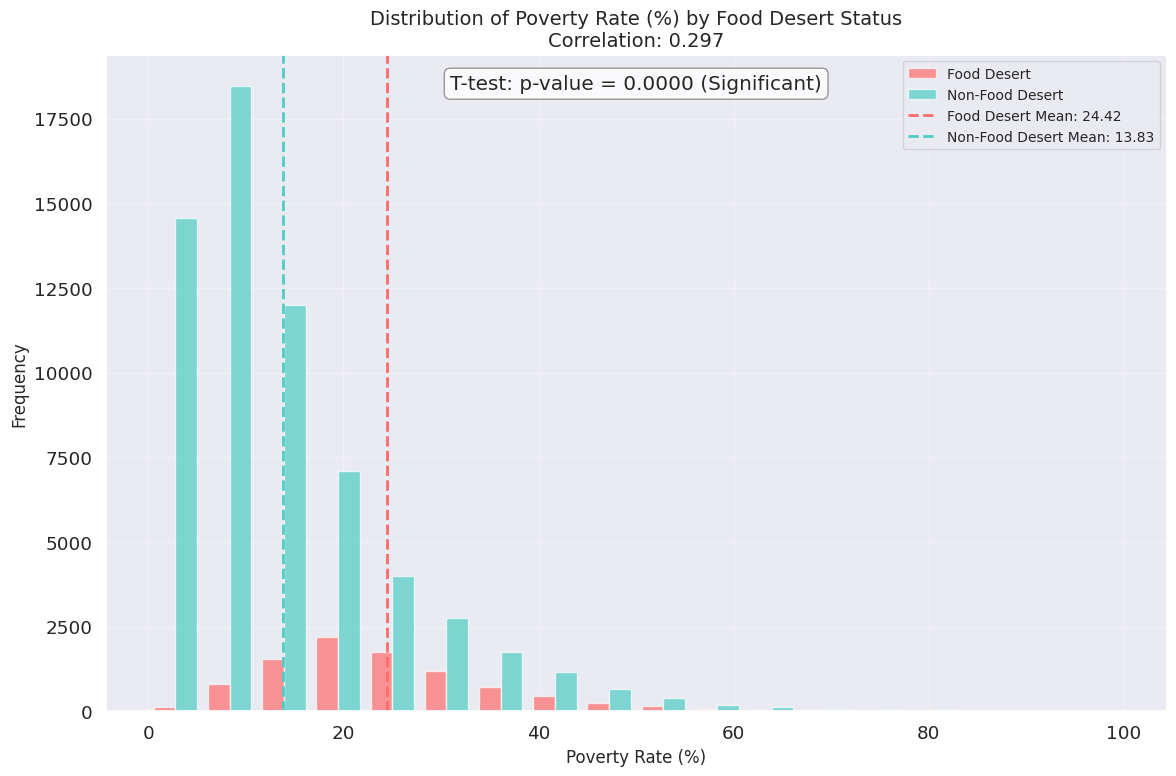

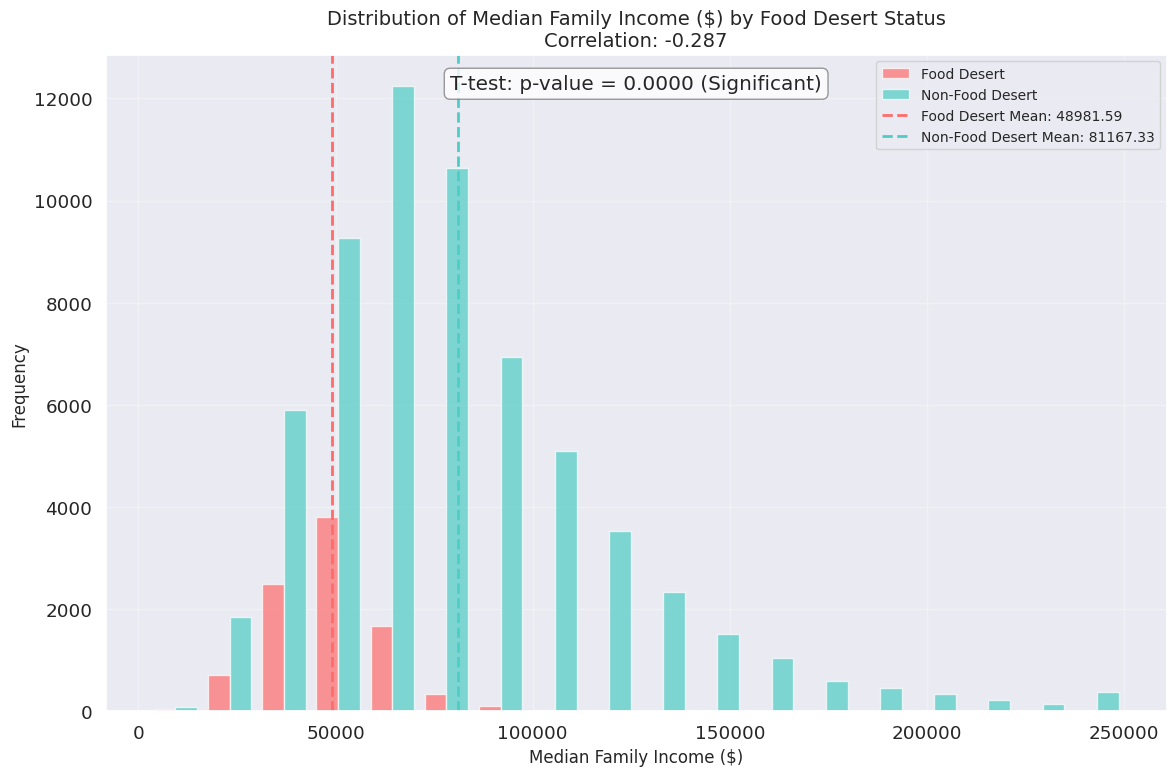

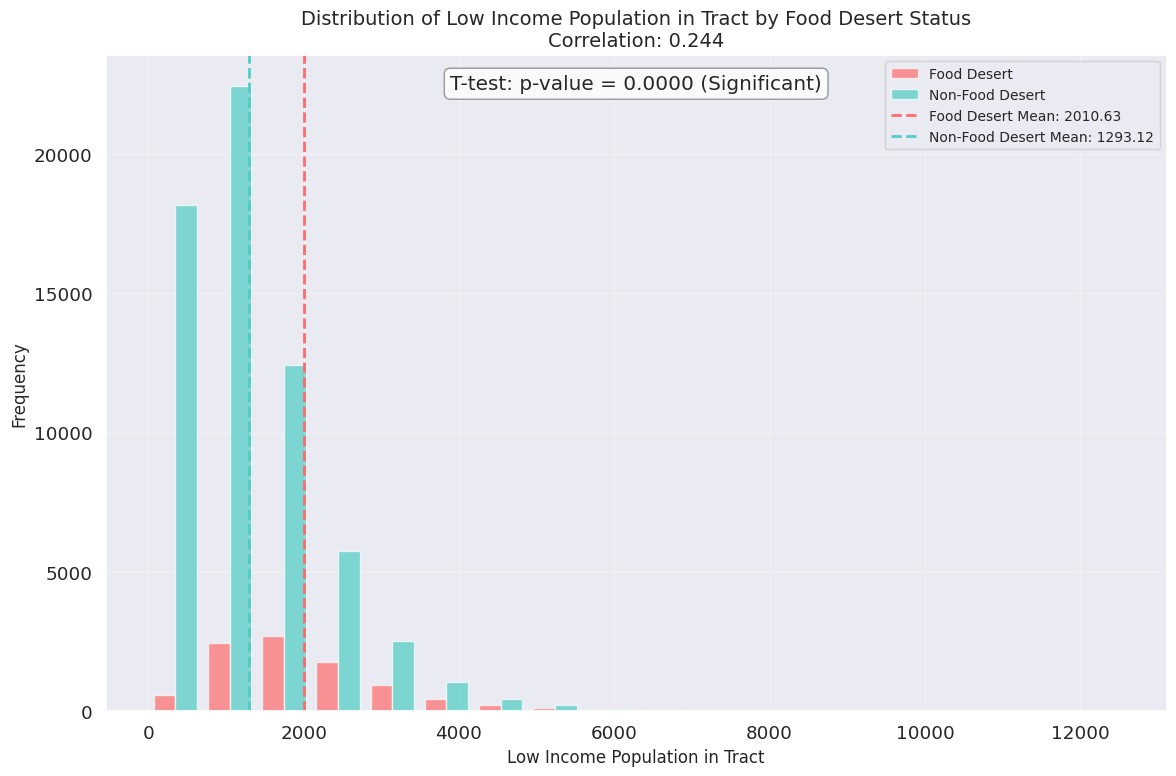

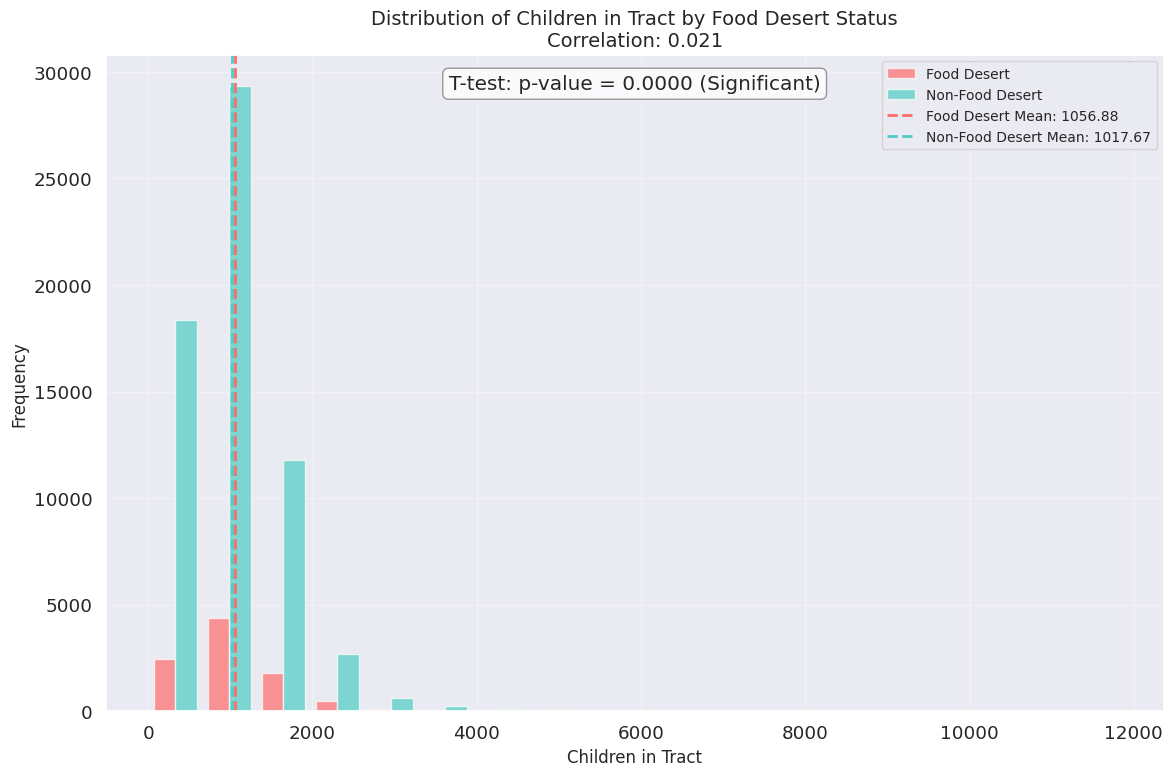

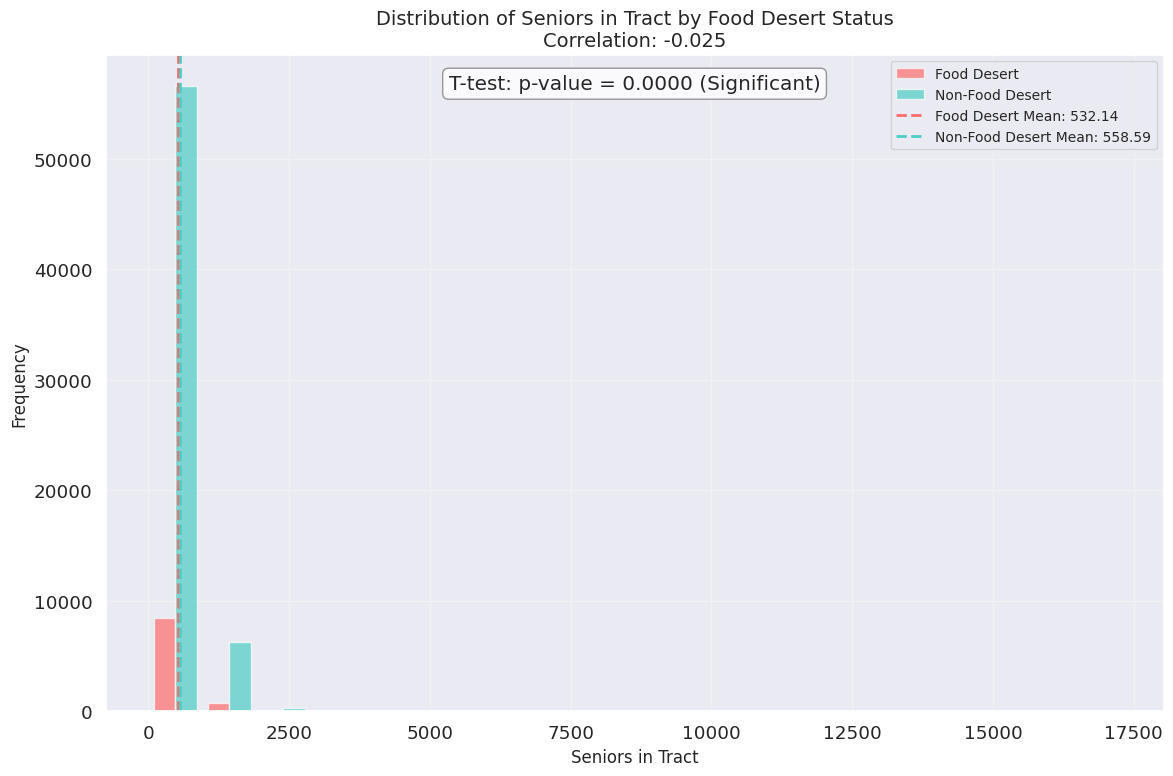

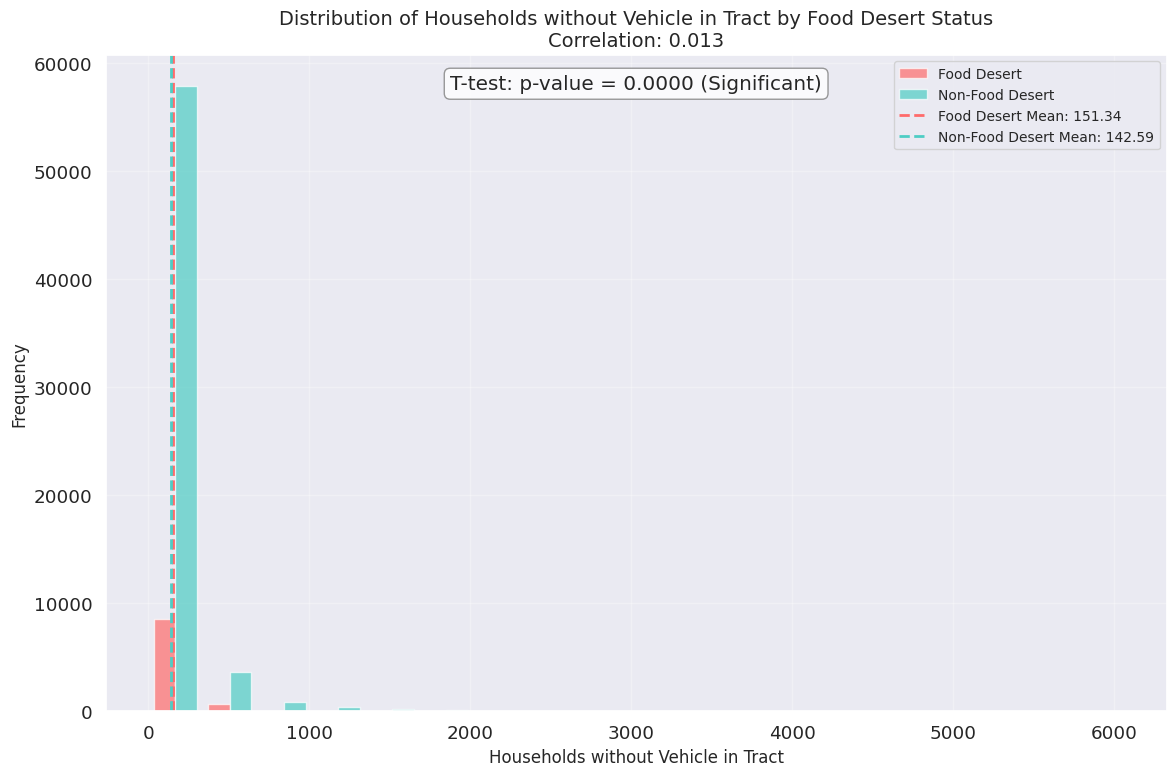

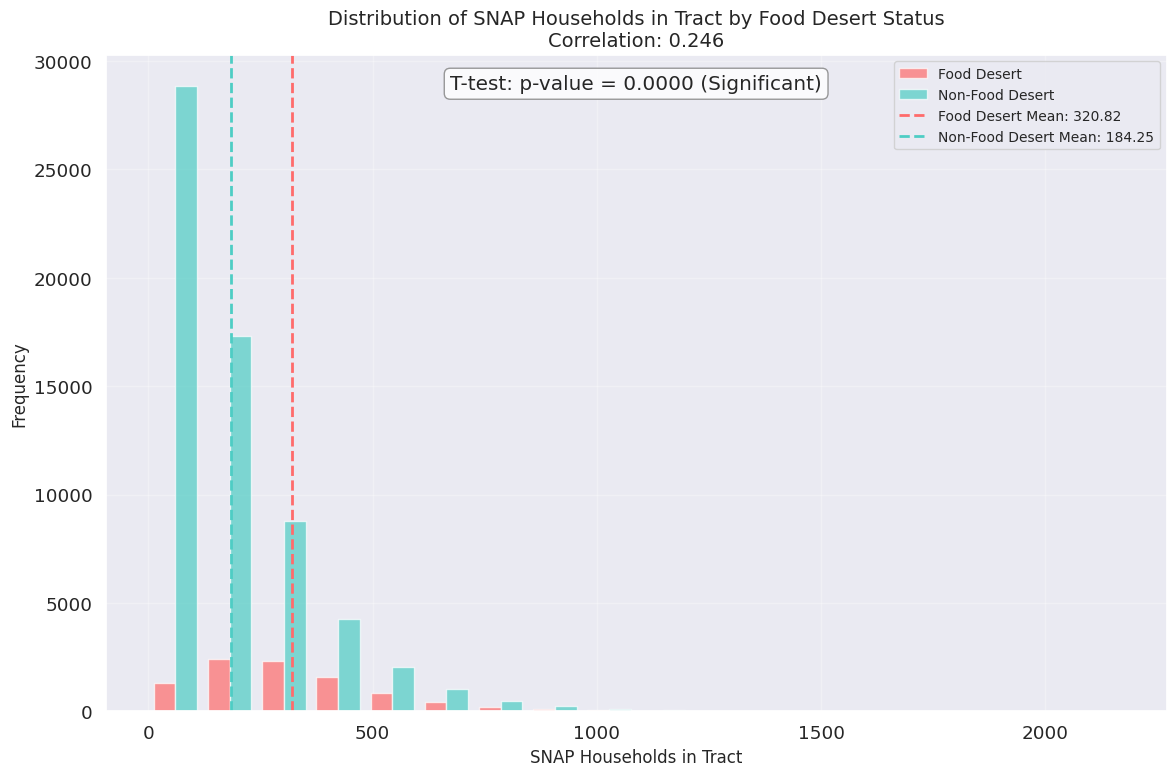

In [63]:
from scipy import stats
# Plot histograms for each demographic factor by food desert status
for factor in demographic_factors:
    if factor in food_research_atlas.columns:
        plt.figure(figsize=(12, 8))

        # Create two separate arrays for food desert and non-food desert tracts
        desert_data = food_research_atlas[food_research_atlas['is_food_desert'] == 1][factor].dropna()
        non_desert_data = food_research_atlas[food_research_atlas['is_food_desert'] == 0][factor].dropna()

        # Calculate number of bins (Sturges' formula)
        n_bins = int(np.ceil(np.log2(len(food_research_atlas)) + 1))

        # Create a suitable range for both histograms
        min_val = min(desert_data.min(), non_desert_data.min())
        max_val = max(desert_data.max(), non_desert_data.max())
        bin_edges = np.linspace(min_val, max_val, n_bins + 1)

        # Plot histograms
        plt.hist([desert_data, non_desert_data], bins=bin_edges, alpha=0.7,
                label=['Food Desert', 'Non-Food Desert'], color=['#ff6b6b', '#4ecdc4'])

        # Calculate means
        desert_mean = desert_data.mean()
        non_desert_mean = non_desert_data.mean()

        # Add vertical lines for means
        plt.axvline(desert_mean, color='#ff6b6b', linestyle='dashed', linewidth=2,
                    label=f'Food Desert Mean: {desert_mean:.2f}')
        plt.axvline(non_desert_mean, color='#4ecdc4', linestyle='dashed', linewidth=2,
                    label=f'Non-Food Desert Mean: {non_desert_mean:.2f}')

        factor_label = feature_descriptions.get(factor, factor)

        correlation = correlation_matrix.loc[factor, 'is_food_desert']
        plt.title(f'Distribution of {factor_label} by Food Desert Status\nCorrelation: {correlation:.3f}',
                 fontsize=14)
        plt.xlabel(factor_label, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.legend(fontsize=10)
        plt.grid(True, alpha=0.3)

        # Add t-test results
        t_stat, p_value = stats.ttest_ind(desert_data, non_desert_data, equal_var=False)
        significance = "Significant" if p_value < 0.05 else "Not Significant"
        plt.annotate(f'T-test: p-value = {p_value:.4f} ({significance})',
                    xy=(0.5, 0.97), xycoords='axes fraction',
                    ha='center', va='top',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

        plt.tight_layout()
        plt.savefig(f'{factor}_histogram.png', dpi=300, bbox_inches='tight')
        plt.show()
        plt.close()

## Rural vs Urban Food Desert Comparison

##### This visualization compares the prevalence of food deserts in urban and rural areas. By calculating the percentage of census tracts that are food deserts in each type of area, we can determine if there are significant differences in food access issues between urban and rural communities. The analysis enables us to see if food desert issues are primarily an urban concern, a rural concern, or present in both settings with the same level of intensity.

<Figure size 1000x600 with 0 Axes>

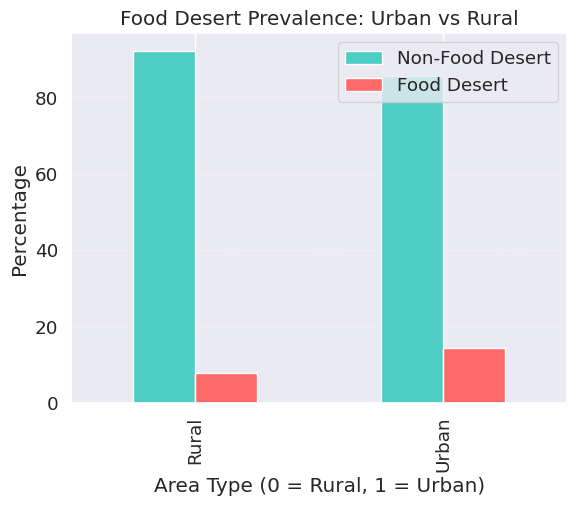

In [64]:
plt.figure(figsize=(10, 6))
urban_desert = food_research_atlas.groupby(['Urban', 'is_food_desert']).size().unstack()
urban_desert_pct = urban_desert.div(urban_desert.sum(axis=1), axis=0) * 100

urban_desert_pct.plot(kind='bar', stacked=False, color=['#4ecdc4', '#ff6b6b'])
plt.title('Food Desert Prevalence: Urban vs Rural')
plt.xlabel('Area Type (0 = Rural, 1 = Urban)')
plt.ylabel('Percentage')
plt.legend(['Non-Food Desert', 'Food Desert'])
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.xticks([0, 1], ['Rural', 'Urban'])
plt.show()
plt.savefig('urban_rural_food_desert.png', dpi=300, bbox_inches='tight')
plt.close()

### Correlation between demographic factors and food desert status

In [65]:
correlation_matrix = food_research_atlas[['is_food_desert'] + demographic_factors].corr()
print("\nCorrelation with Food Desert Status:")
print(correlation_matrix['is_food_desert'].sort_values(ascending=False))


Correlation with Food Desert Status:
is_food_desert        1.000000
PovertyRate           0.297009
TractSNAP             0.245726
TractLOWI             0.243792
TractKids             0.021294
TractHUNV             0.012573
TractSeniors         -0.025128
MedianFamilyIncome   -0.286697
Name: is_food_desert, dtype: float64


## Analyzing Geographic Distribution of Food Deserts

#####This analysis examines the geographic distribution of food deserts across different states in the U.S. By calculating the percentage of census tracts classified as food deserts within each state, we can identify which regions of the country are most affected by limited access to healthy food. This state-level breakdown helps policymakers prioritize resources and develop targeted interventions for the most vulnerable areas. The visualization makes it easy to spot patterns and regional disparities in food access challenges across the United States.


Percentage of Food Deserts by State:
State
Mississippi             0.315630
New Mexico              0.253012
Arkansas                0.249271
Louisiana               0.228521
Alabama                 0.226655
Georgia                 0.225345
South Carolina          0.199817
Alaska                  0.197605
Texas                   0.195113
Indiana                 0.193099
Kansas                  0.181462
Tennessee               0.178643
Missouri                0.178289
Oklahoma                0.169216
Arizona                 0.169079
North Carolina          0.162299
Delaware                0.149533
South Dakota            0.144144
Minnesota               0.143928
Ohio                    0.143051
Virginia                0.142630
Colorado                0.139291
Kentucky                0.137838
Idaho                   0.137584
West Virginia           0.136364
Montana                 0.132841
Florida                 0.131516
New Hampshire           0.130137
Michigan                0.123004

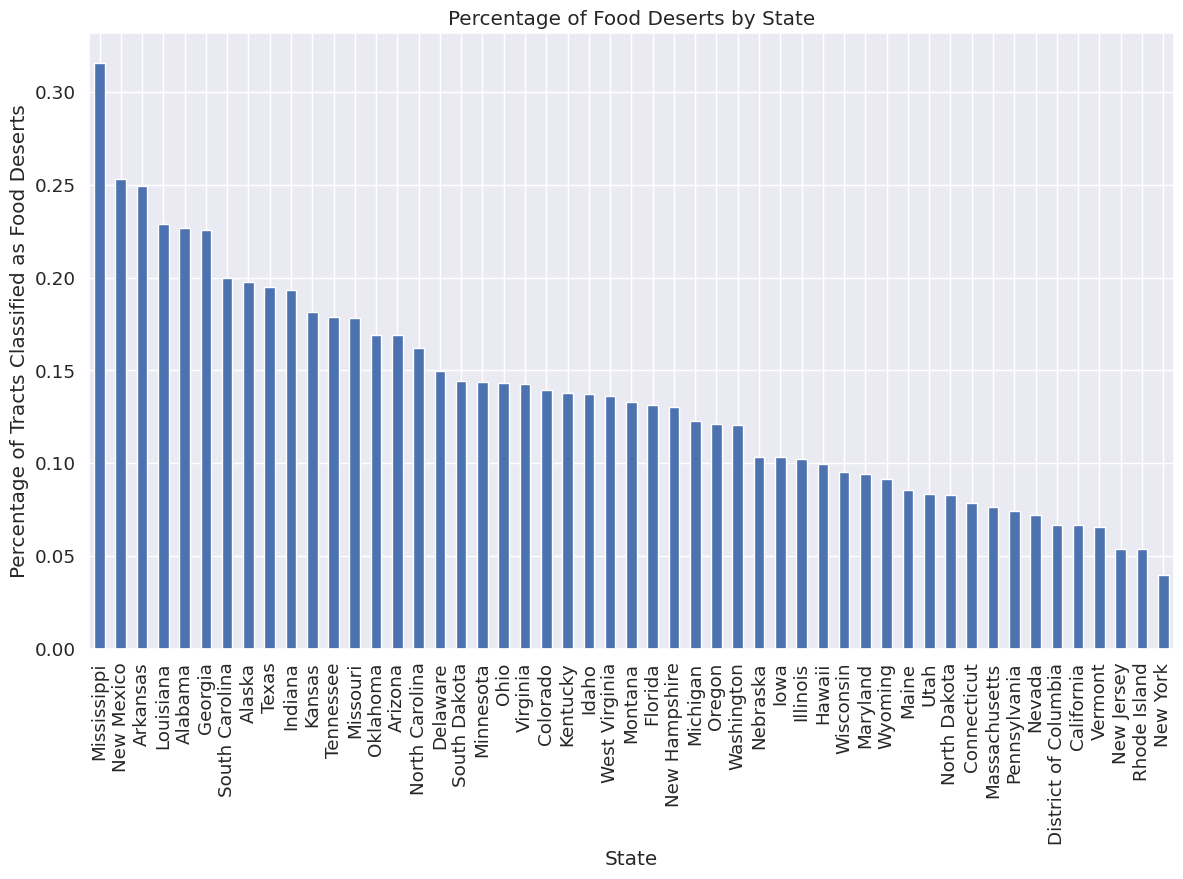

In [66]:
# Analyze food deserts by state
state_food_deserts = food_research_atlas.groupby('State')['is_food_desert'].mean().sort_values(ascending=False)
print("\nPercentage of Food Deserts by State:")
print(state_food_deserts)

# Visualize food deserts by state
plt.figure(figsize=(14, 8))
state_food_deserts.plot(kind='bar')
plt.title('Percentage of Food Deserts by State')
plt.xlabel('State')
plt.ylabel('Percentage of Tracts Classified as Food Deserts')
plt.xticks(rotation=90)
plt.show()

## Analyzing Geographic Distribution of Food Deserts
#####Same visualization with top 10 states


Percentage of Food Deserts by State:
State
Mississippi             0.315630
New Mexico              0.253012
Arkansas                0.249271
Louisiana               0.228521
Alabama                 0.226655
Georgia                 0.225345
South Carolina          0.199817
Alaska                  0.197605
Texas                   0.195113
Indiana                 0.193099
Kansas                  0.181462
Tennessee               0.178643
Missouri                0.178289
Oklahoma                0.169216
Arizona                 0.169079
North Carolina          0.162299
Delaware                0.149533
South Dakota            0.144144
Minnesota               0.143928
Ohio                    0.143051
Virginia                0.142630
Colorado                0.139291
Kentucky                0.137838
Idaho                   0.137584
West Virginia           0.136364
Montana                 0.132841
Florida                 0.131516
New Hampshire           0.130137
Michigan                0.123004

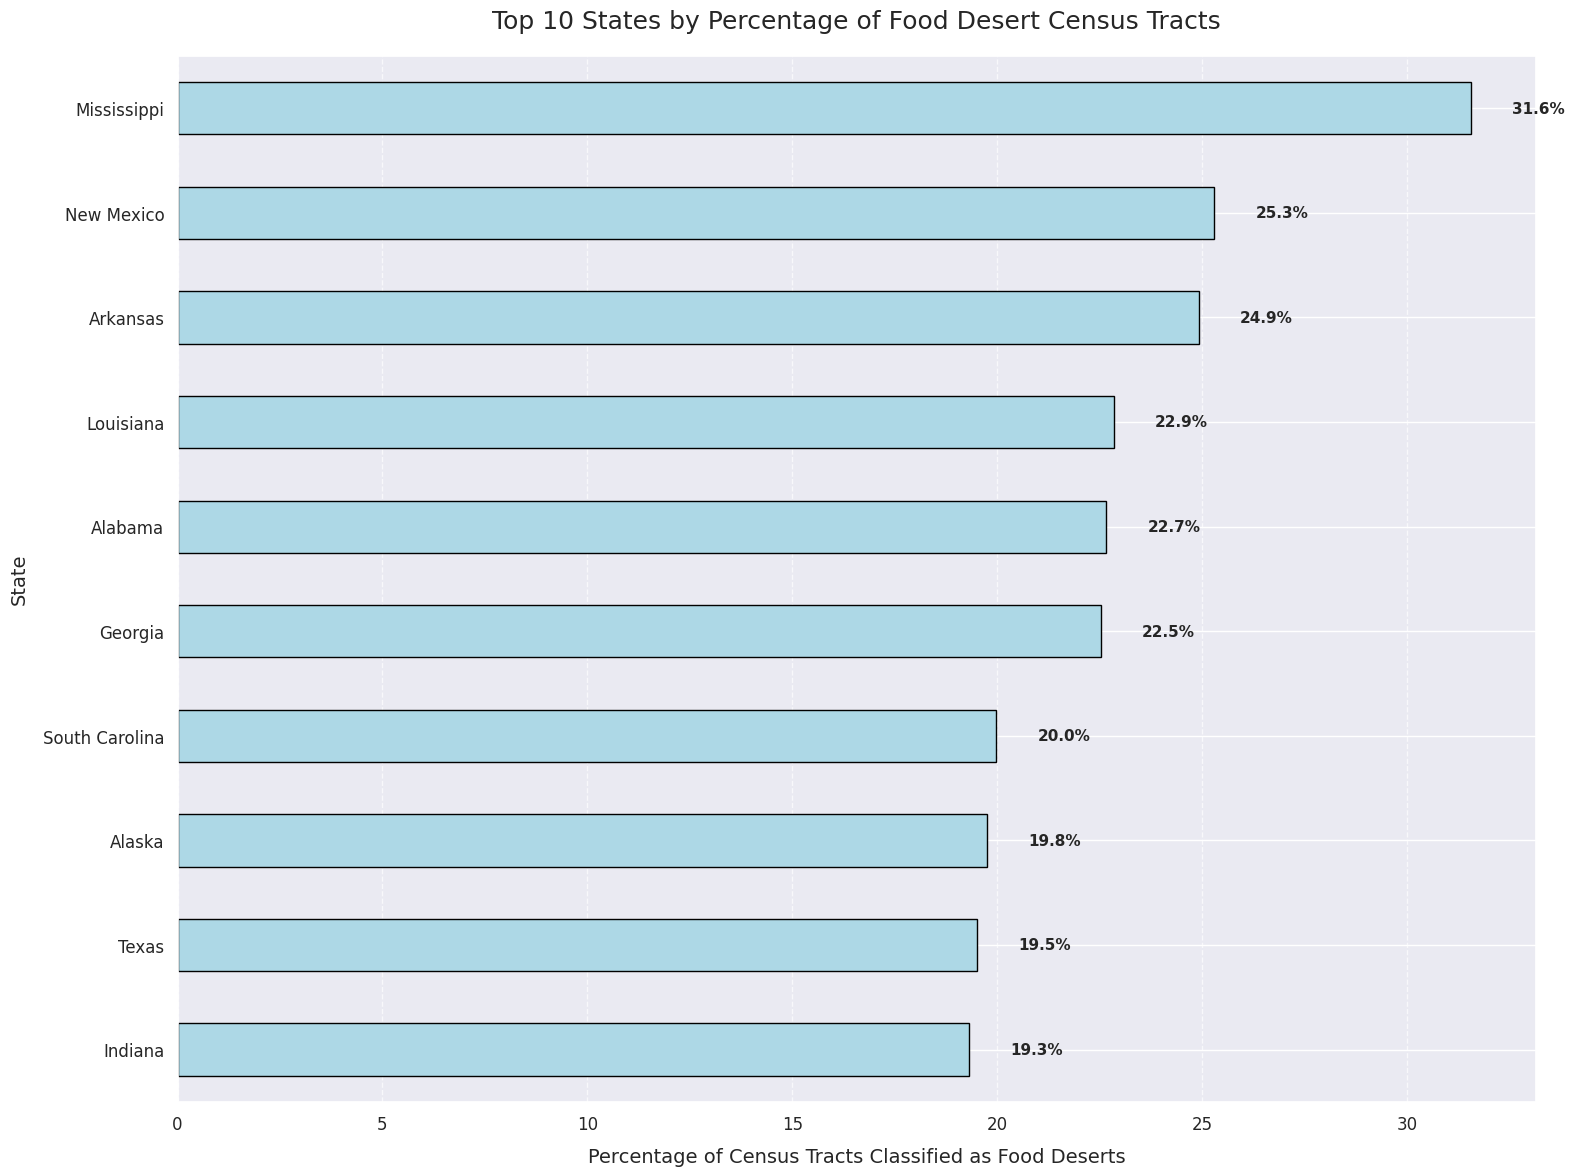

In [67]:
# Analyze food deserts by state
state_food_deserts = food_research_atlas.groupby('State')['is_food_desert'].mean().sort_values(ascending=False)
print("\nPercentage of Food Deserts by State:")
print(state_food_deserts)

# Calculate the percentage rather than the mean
state_food_desert_counts = food_research_atlas.groupby('State')['is_food_desert'].agg(['sum', 'count'])
state_food_desert_counts['percentage'] = state_food_desert_counts['sum'] / state_food_desert_counts['count'] * 100
state_food_desert_pct = state_food_desert_counts['percentage'].sort_values(ascending=False)

# Get the top 10 states with highest food desert percentages
top_20_states = state_food_desert_pct.head(10)

plt.figure(figsize=(16, 12))
reversed_top_20 = top_20_states.iloc[::-1]

ax = reversed_top_20.plot(kind='barh', color='#add8e6', edgecolor='black', linewidth=1)

# Enhance the visualization
plt.title('Top 10 States by Percentage of Food Desert Census Tracts', fontsize=18, pad=20)
plt.ylabel('State', fontsize=14, labelpad=10)
plt.xlabel('Percentage of Census Tracts Classified as Food Deserts', fontsize=14, labelpad=10)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(reversed_top_20):
    ax.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()

# Save the figure
plt.savefig('top_20_food_desert_states_truly_descending.png', dpi=300, bbox_inches='tight')
plt.show()

##Understanding Vehicle Access and Its Impact Scatterplots
#####This review of findings and relationships evaluated the link between vehicle access and the food desert status across a variety of measures. Transportation is an important part of food access, particularly for residents who have to travel distances to access the grocery store. By evaluating poverty rates for several measures of vehicle access (up to 0.5 miles, up to 1 mile, and more than 20 miles), we will understand how transportation limitations are related to poverty rates in food desert and non-food desert sectors. The scatter plots will illustrate how households without a viable transportation means were distributed across poverty measures and food desert status. This could inform if there were disproportionate transport barriers for low-income communities and how vehicle access barriers compounded food access problems. Understanding these relationships is crucial for creating effective interventions that look at economic and transport barriers to access healthy food.

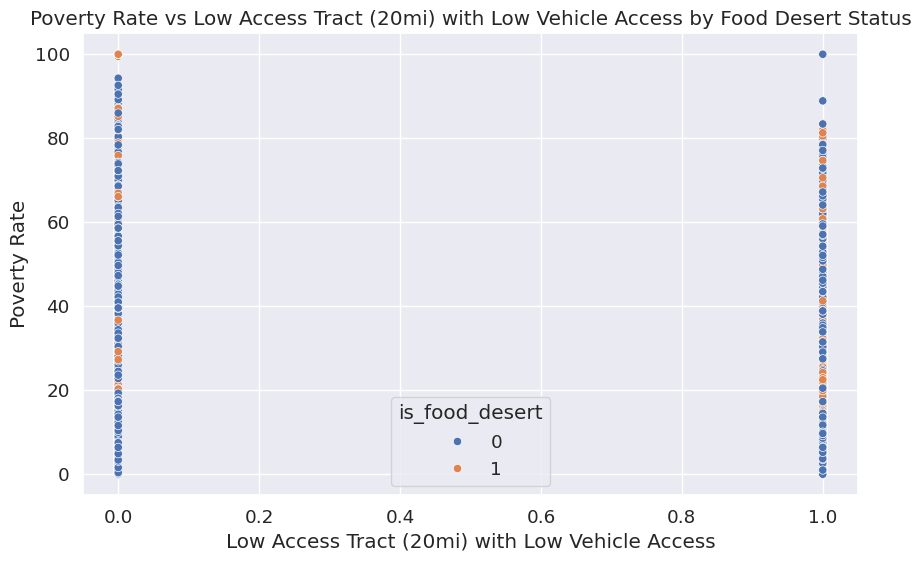

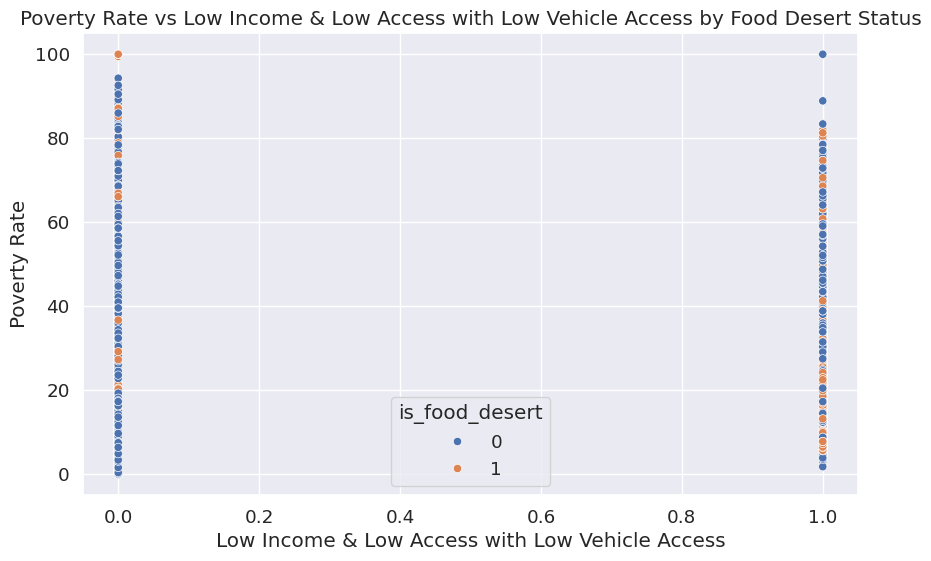

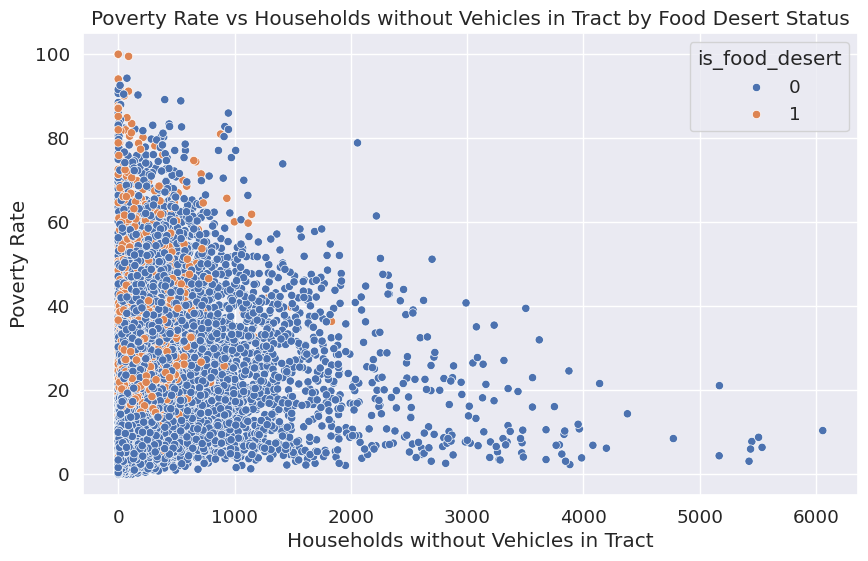

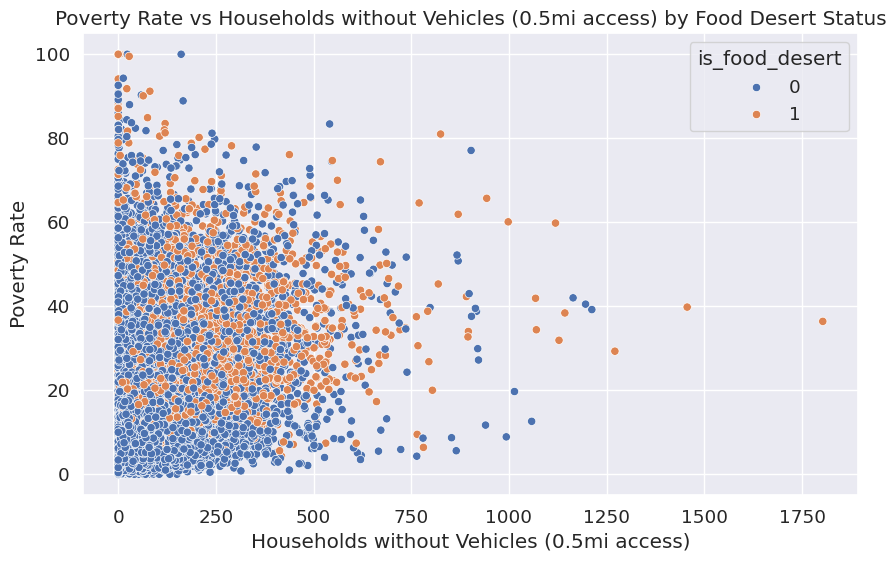

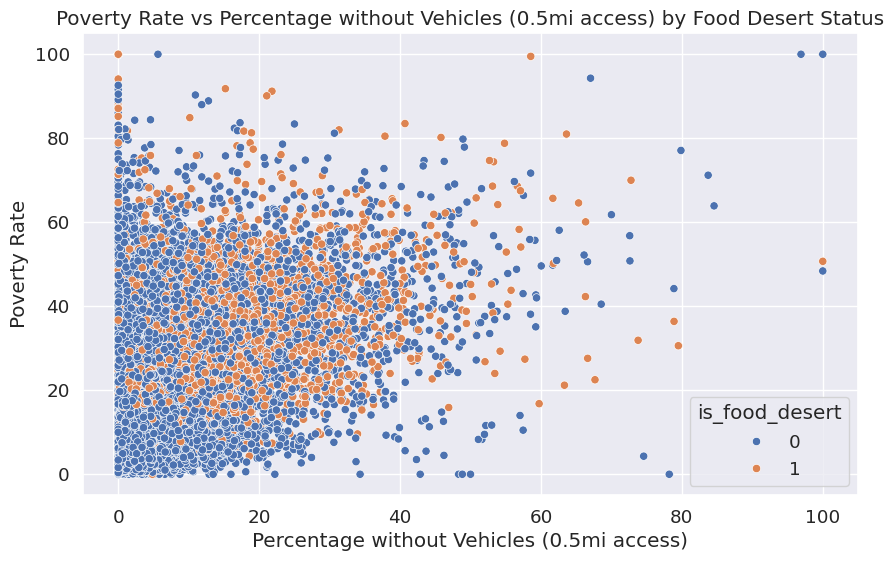

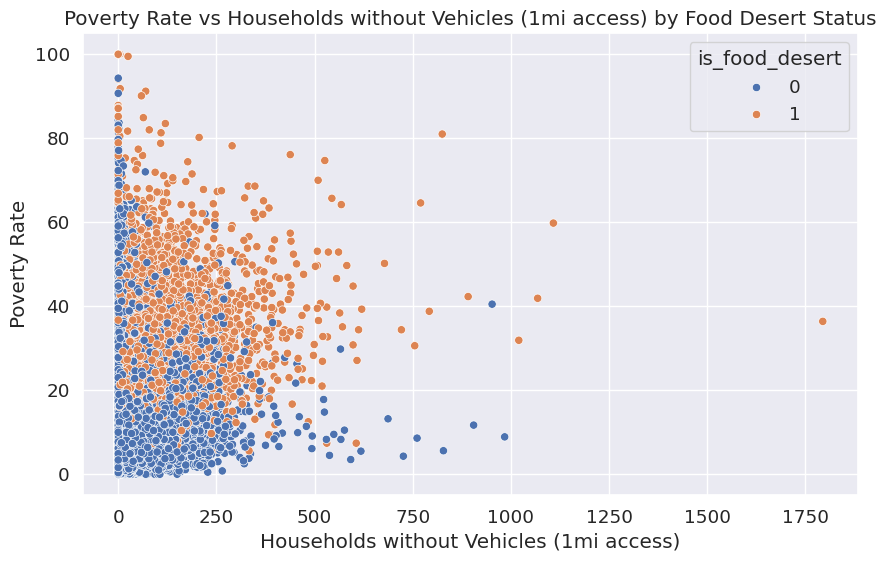

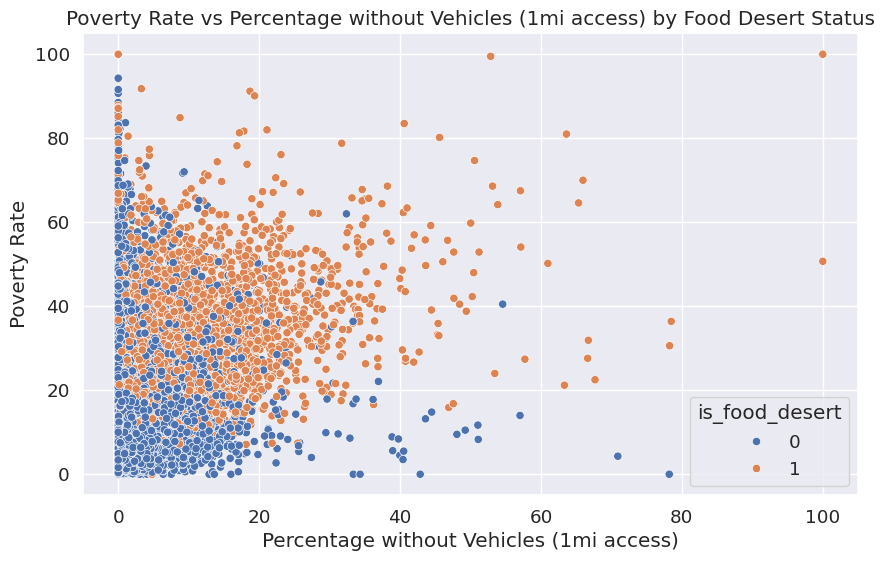

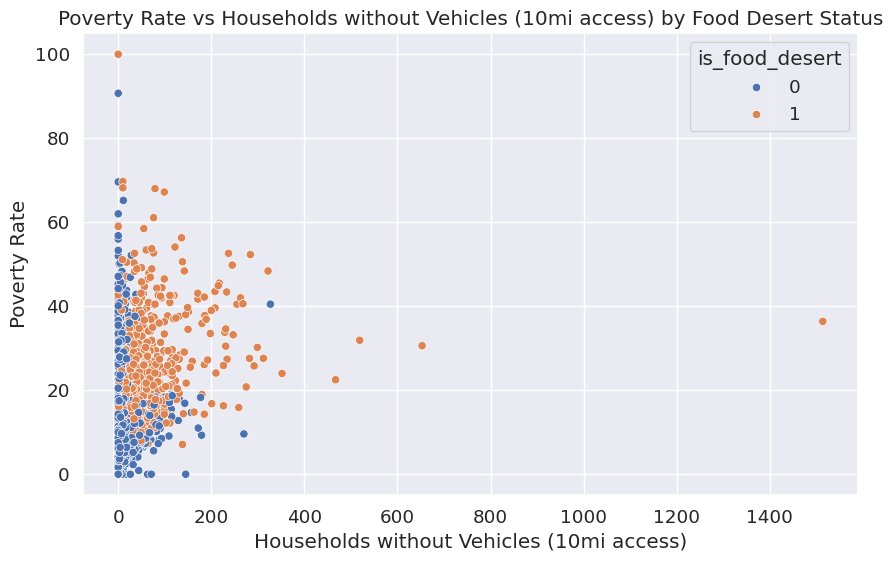

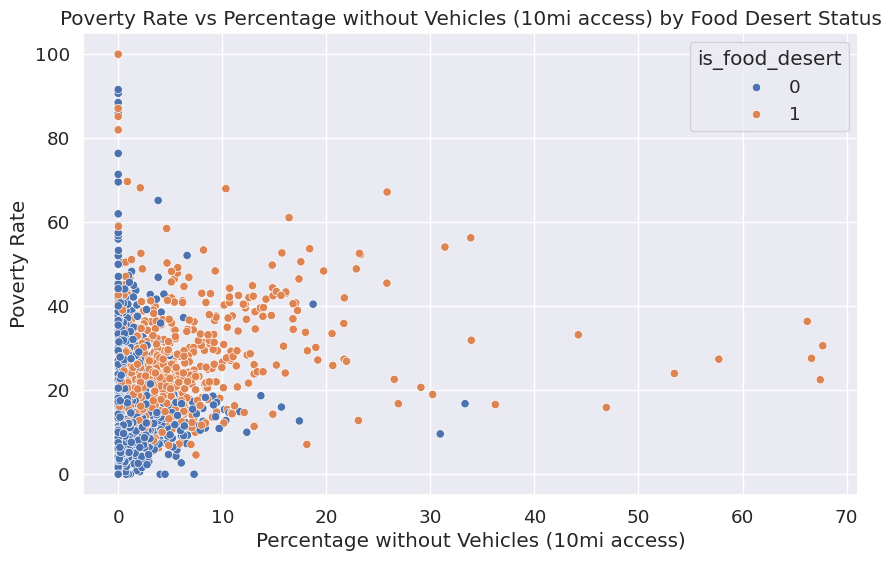

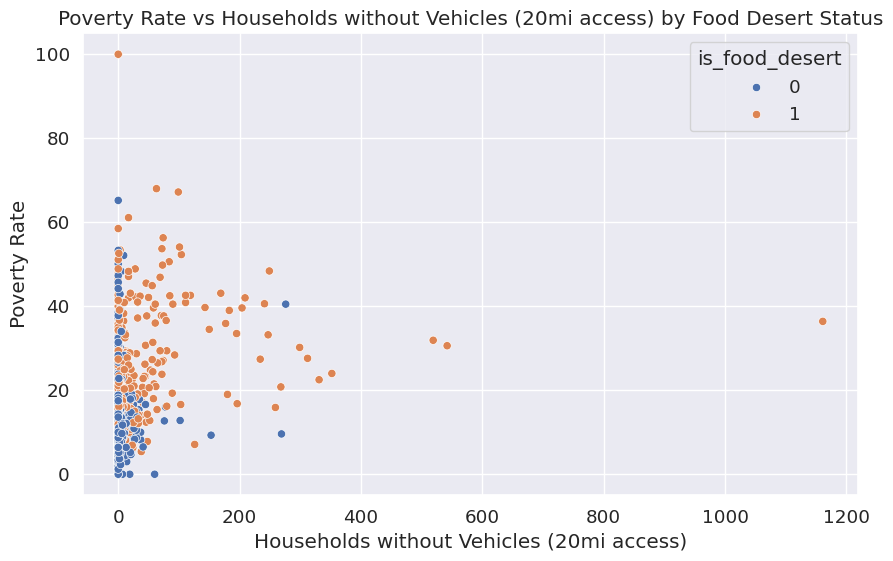

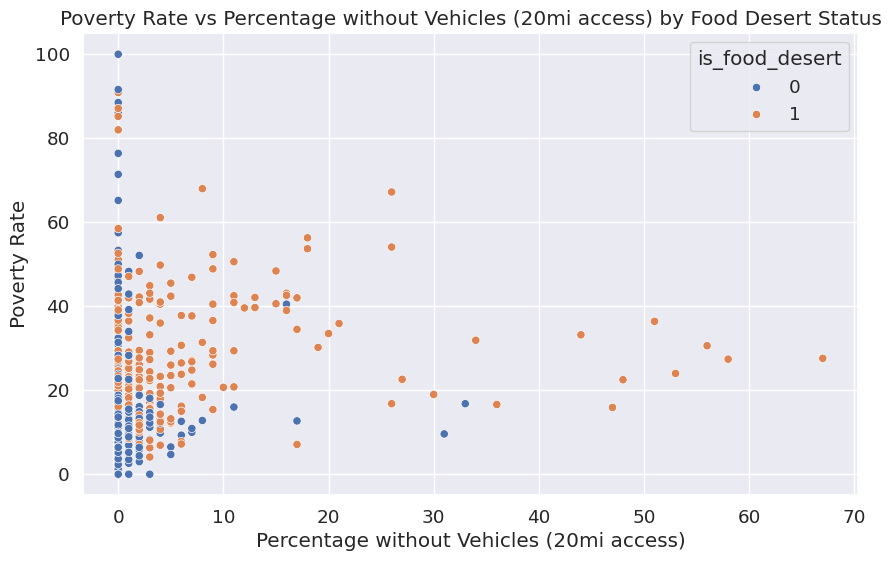

In [68]:
# Analyze vehicle access in food deserts
vehicle_access_factors = [
    'LATractsVehicle_20', 'LILATracts_Vehicle', 'TractHUNV',
    'lahunvhalf', 'lahunvhalfshare', 'lahunv1', 'lahunv1share',
    'lahunv10', 'lahunv10share', 'lahunv20', 'lahunv20share'
]

feature_descriptions = {
    'LATractsVehicle_20': 'Low Access Tract (20mi) with Low Vehicle Access',
    'LILATracts_Vehicle': 'Low Income & Low Access with Low Vehicle Access',
    'TractHUNV': 'Households without Vehicles in Tract',
    'lahunvhalf': 'Households without Vehicles (0.5mi access)',
    'lahunvhalfshare': 'Percentage without Vehicles (0.5mi access)',
    'lahunv1': 'Households without Vehicles (1mi access)',
    'lahunv1share': 'Percentage without Vehicles (1mi access)',
    'lahunv10': 'Households without Vehicles (10mi access)',
    'lahunv10share': 'Percentage without Vehicles (10mi access)',
    'lahunv20': 'Households without Vehicles (20mi access)',
    'lahunv20share': 'Percentage without Vehicles (20mi access)'
}


# Check correlation between vehicle access and food desert status
for factor in vehicle_access_factors:
    if factor in food_research_atlas.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=factor, y='PovertyRate', hue='is_food_desert', data=food_research_atlas)
        factor_label1= feature_descriptions.get(factor, factor)
        plt.title(f'Poverty Rate vs {factor_label1} by Food Desert Status')
        plt.xlabel(factor_label1)
        plt.ylabel('Poverty Rate')
        plt.show()

## Understanding Vehicle Access and Its Impact Barplots

#####This visualization offers a thorough comparison of vehicle access characteristics between food deserts and non-food deserts through a series of multiple bar plots. This methodology enables side-by-side comparisons of average values for each measure of vehicle access, rather than separate scatter plots for each measure.The multiple bar plots are shown in a convenient sub-plots format of displaying several metrics at different distance thresholds, ranging from 0.5 miles to 20 miles, in the same figure. This allows one to quickly see patterns and differences. Each sub-plot displays the average value of a measure of vehicle access, with values shown in the right-portion of the plot for ease of comparison.This visualization compares transportation disadvantages in food desert areas with the vehicle access status of non-food desert areas and portrays how barriers to vehicle access worsen level of food insecurity. The clear formatting and the use of the same color across measures clearly illustrates that food desert areas experience significantly higher barriers to transportation across nearly all measures than non-food desert areas. This comparison is beneficial for the specific goal of designing transportation-based approaches to improve access to food in food insecure neighborhoods.

<ipython-input-69-fc6f63f0f17c>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
<ipython-input-69-fc6f63f0f17c>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
<ipython-input-69-fc6f63f0f17c>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
<ipython-input-69-fc6f63f0f17c>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(
<ipython-input-69-fc6f63f0f17c>:44: 

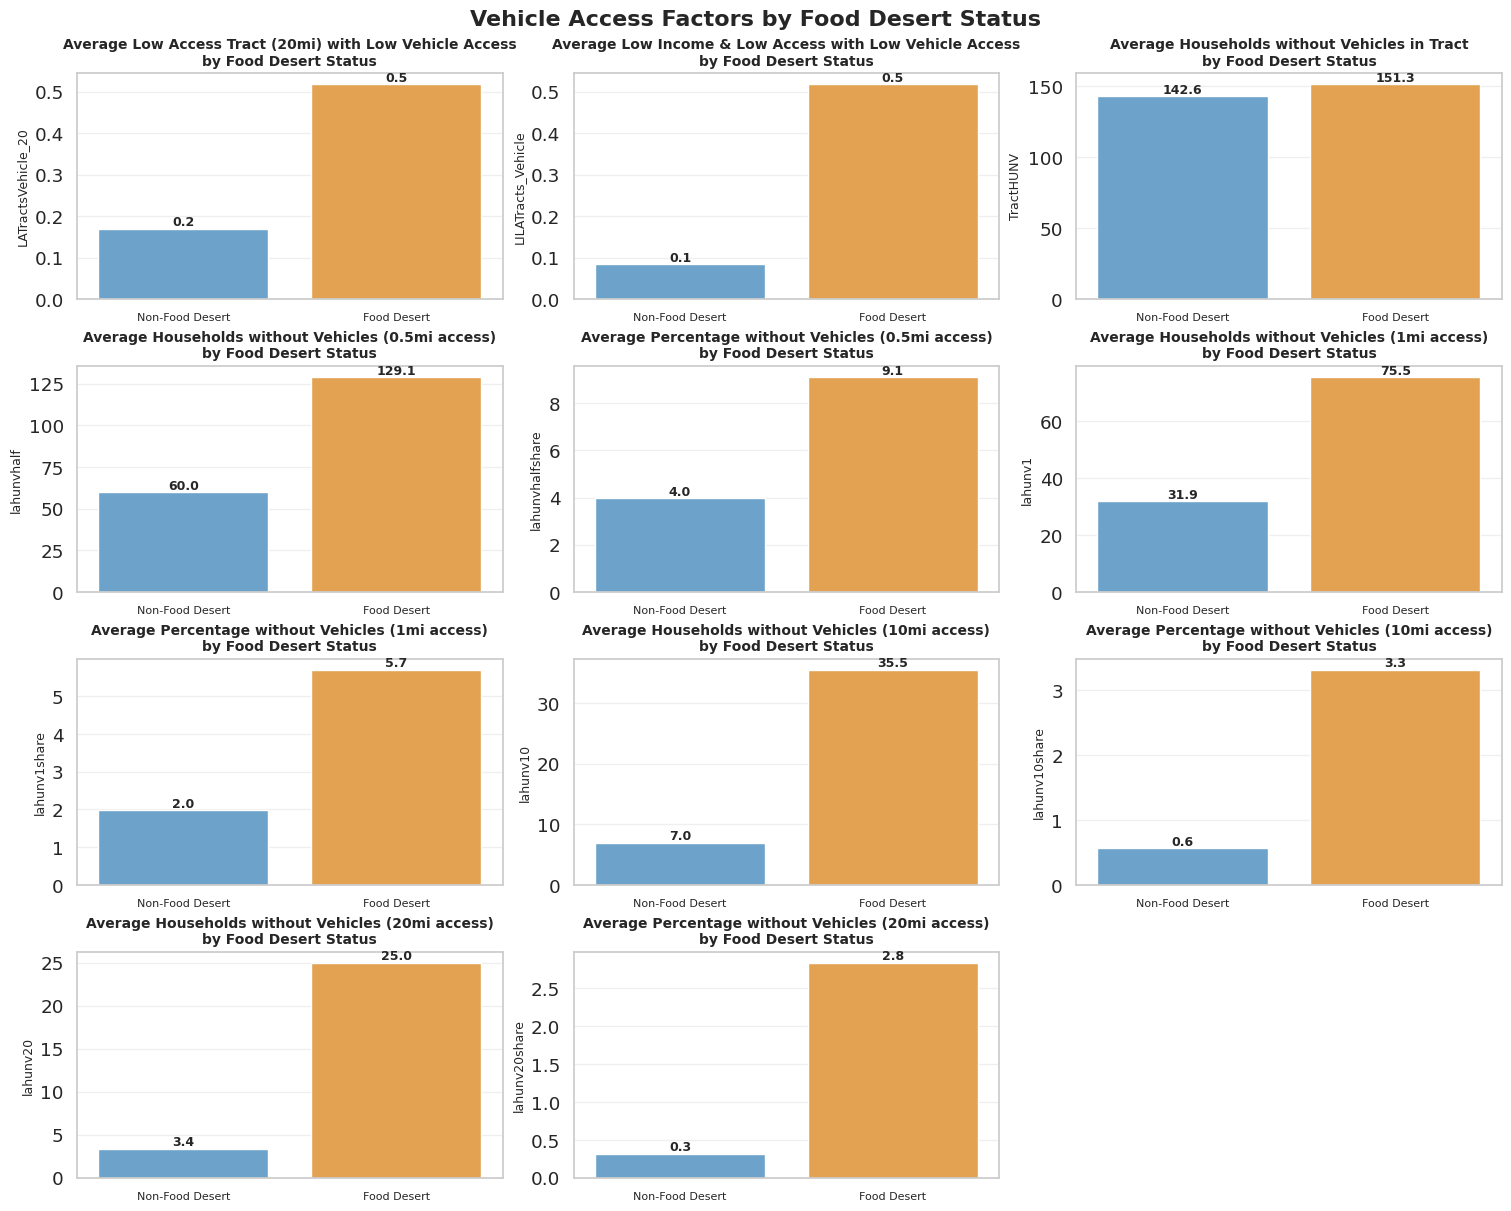

In [69]:
### Understanding Vehicle Access and Its Impact
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Dictionary of brief, clear descriptions for each vehicle access factor
factor_descriptions = {
    'LATractsVehicle_20': 'Low Access Tract (20mi) with Low Vehicle Access',
    'LILATracts_Vehicle': 'Low Income & Low Access with Low Vehicle Access',
    'TractHUNV': 'Households without Vehicles in Tract',
    'lahunvhalf': 'Households without Vehicles (0.5mi access)',
    'lahunvhalfshare': 'Percentage without Vehicles (0.5mi access)',
    'lahunv1': 'Households without Vehicles (1mi access)',
    'lahunv1share': 'Percentage without Vehicles (1mi access)',
    'lahunv10': 'Households without Vehicles (10mi access)',
    'lahunv10share': 'Percentage without Vehicles (10mi access)',
    'lahunv20': 'Households without Vehicles (20mi access)',
    'lahunv20share': 'Percentage without Vehicles (20mi access)'
}

# Get valid vehicle access factors
valid_vehicle_factors = [factor for factor in vehicle_access_factors if factor in food_research_atlas.columns]

# Calculate how many plots we need
n_factors = len(valid_vehicle_factors)

# Create a figure with subplots
plt.figure(figsize=(15, 3 * math.ceil(n_factors / 3)), constrained_layout=True)

sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans', 'Liberation Sans']

# Create subplots
for i, factor in enumerate(valid_vehicle_factors, 1):
    # Create subplot
    plt.subplot(math.ceil(n_factors / 3), 3, i)

    # Calculate average values for the factor by food desert status
    avg_by_status = food_research_atlas.groupby('is_food_desert')[factor].mean().reset_index()

    # Create bar plot
    bars = sns.barplot(
        x='is_food_desert',
        y=factor,
        data=avg_by_status,
        palette=['#5DA5DA', '#FAA43A']
    )

    for p in bars.patches:
        bars.annotate(
            f'{p.get_height():.1f}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center',
            va='bottom',
            fontsize=9,
            fontweight='bold'
        )

    factor_label = factor_descriptions.get(factor, factor)

    plt.title(f'Average {factor_label}\nby Food Desert Status', fontsize=10, fontweight='bold')

    plt.xticks([0, 1], ['Non-Food Desert', 'Food Desert'], fontsize=8)

    plt.xlabel('')

    plt.ylabel(factor, fontsize=9)

    plt.grid(axis='y', alpha=0.3)

plt.suptitle('Vehicle Access Factors by Food Desert Status', fontsize=16, fontweight='bold')

plt.show()

## Debugging demographic factors analysis
#####This section does a thorough validation and statistical analysis of demographic factors in relation to food desert classifications. The code will go through each demographic factor (low-income population, children, seniors, racial/ethnic groups, vehicle access, SNAP participation) to verify data quality prior to statistical analyses. The analysis will first validate each demographic by checking for missing values to ensure there are no missing demographic data, double-checking that food desert classification has been validly coded, and checking to see whether the demographic factor type has been defined correctly (e.g. ensuring numerical types are defined as numbers). The analysis will separate food desert status and print summary statistics for the demographic factors to explore the existence of any differences in food desert status. The subsequent statistical analyses implement independent t-tests (with Welch's correction for non-equal variance) to discover is the difference between food desert and non-food desert areas are statistically significant. The code includes error handling to potential data problems down (e.g. missing values or infinite values) that would hinder the statistical tests. This comprehensive approach establishes that whatever conclusions we draw about demographic patterns in food deserts are valid, based on sound statistics and not random fluctuations in the data.

In [70]:
# Debugging demographic factors analysis
demographic_factors = [
    'TractLOWI', 'TractKids', 'TractSeniors',
    'TractWhite', 'TractBlack', 'TractAsian',
    'TractNHOPI', 'TractAIAN', 'TractOMultir',
    'TractHispanic', 'TractHUNV', 'TractSNAP'
]

# First, let's check the data
print("Data Validation:")
for factor in demographic_factors:
    if factor in food_research_atlas.columns:
        print(f"\n{factor} Data:")
        # Check for missing values
        print("Missing values:", food_research_atlas[factor].isnull().sum())

        # Check unique values in food desert status
        print("Unique food desert status:",
              food_research_atlas['is_food_desert'].unique())

        # Check data types
        print("Data type:", food_research_atlas[factor].dtype)

        # Group data
        grouped = food_research_atlas.groupby('is_food_desert')[factor]
        print("Food Desert Group Counts:", grouped.count())
        print("Food Desert Group Means:", grouped.mean())

# If the data looks good, we'll do a more robust statistical test
import numpy as np
import scipy.stats as stats

print("\nStatistical Test Results:")
for factor in demographic_factors:
    if factor in food_research_atlas.columns:
        # Separate data for food desert and non-food desert
        food_desert = food_research_atlas[food_research_atlas['is_food_desert'] == 1][factor]
        non_food_desert = food_research_atlas[food_research_atlas['is_food_desert'] == 0][factor]

        print(f"\n{factor}:")
        print("Food Desert Data:")
        print(food_desert.describe())
        print("\nNon-Food Desert Data:")
        print(non_food_desert.describe())

        # Perform statistical test with error handling
        try:
            # Check for NaN or infinite values
            if (np.isnan(food_desert).any() or np.isnan(non_food_desert).any() or
                np.isinf(food_desert).any() or np.isinf(non_food_desert).any()):
                print("Warning: NaN or infinite values detected")
                continue

            # Perform t-test
            t_stat, p_value = stats.ttest_ind(food_desert, non_food_desert, equal_var=False)
            print(f"T-statistic: {t_stat}")
            print(f"P-value: {p_value}")
        except Exception as e:
            print(f"Error performing t-test: {e}")

Data Validation:

TractLOWI Data:
Missing values: 4
Unique food desert status: [0 1]
Data type: float64
Food Desert Group Counts: is_food_desert
0    63234
1     9293
Name: TractLOWI, dtype: int64
Food Desert Group Means: is_food_desert
0    1293.118307
1    2010.631013
Name: TractLOWI, dtype: float64

TractKids Data:
Missing values: 4
Unique food desert status: [0 1]
Data type: float64
Food Desert Group Counts: is_food_desert
0    63234
1     9293
Name: TractKids, dtype: int64
Food Desert Group Means: is_food_desert
0    1017.671269
1    1056.881416
Name: TractKids, dtype: float64

TractSeniors Data:
Missing values: 4
Unique food desert status: [0 1]
Data type: float64
Food Desert Group Counts: is_food_desert
0    63234
1     9293
Name: TractSeniors, dtype: int64
Food Desert Group Means: is_food_desert
0    558.586077
1    532.136985
Name: TractSeniors, dtype: float64

TractWhite Data:
Missing values: 4
Unique food desert status: [0 1]
Data type: float64
Food Desert Group Counts: is_f

##SNAP Participation Analysis
#####This section analyzes SNAP (Supplemental Nutrition Assistance Program) participation related to food desert status. SNAP participation will involve several categories, overall participation, and access measures at distance buffers (0.5, 1, 10, and 20 miles).The first task will be to produce summary statistics for each of the SNAP variables with the summary statistics broken out by food desert status. It will be important to show differences between the food desert and non-food desert areas, both in the number of SNAP households, as well as, accessed food options. The data visualization will include a multi-panel figure which will include bar graphs for each SNAP factor. Each subplot will provide average values and standard errors of each food option, making it possible to statistically compare food desert to non-food desert areas. The labelling of the bar charts and value annotations will provide adequate informational for to see patterns by measure of SNAP participation.Overall, this programmatic approach to analyzing SNAP participation provides insight into federal food assistance program implication with respect to geographic food access issues. The findings can add to policymakers’ understanding to better alignment the distribution of SNAP benefits with ongoing initiatives to increase the potential of physical access to healthy food options in underrepresented communities.

SNAP Participation Summary Statistics:

Number of SNAP Households in Tract:
                  count        mean         std  min    25%    50%    75%     max
is_food_desert                                                                   
0               63234.0  184.254578  176.092729  0.0   59.0  136.0  255.0  2175.0
1                9293.0  320.822017  205.068742  0.0  176.0  286.0  424.0  1888.0

SNAP Households with Low Access (0.5mi):
                  count        mean         std  min    25%    50%    75%     max
is_food_desert                                                                   
0               58670.0  113.040447  113.818950  0.0   29.0   80.0  160.0  1540.0
1                9293.0  277.230173  173.276954  0.0  154.0  248.0  367.0  1582.0

Share of SNAP Households with Low Access (0.5mi):
                  count       mean        std  min    25%    50%    75%    max
is_food_desert                                                                
0               5

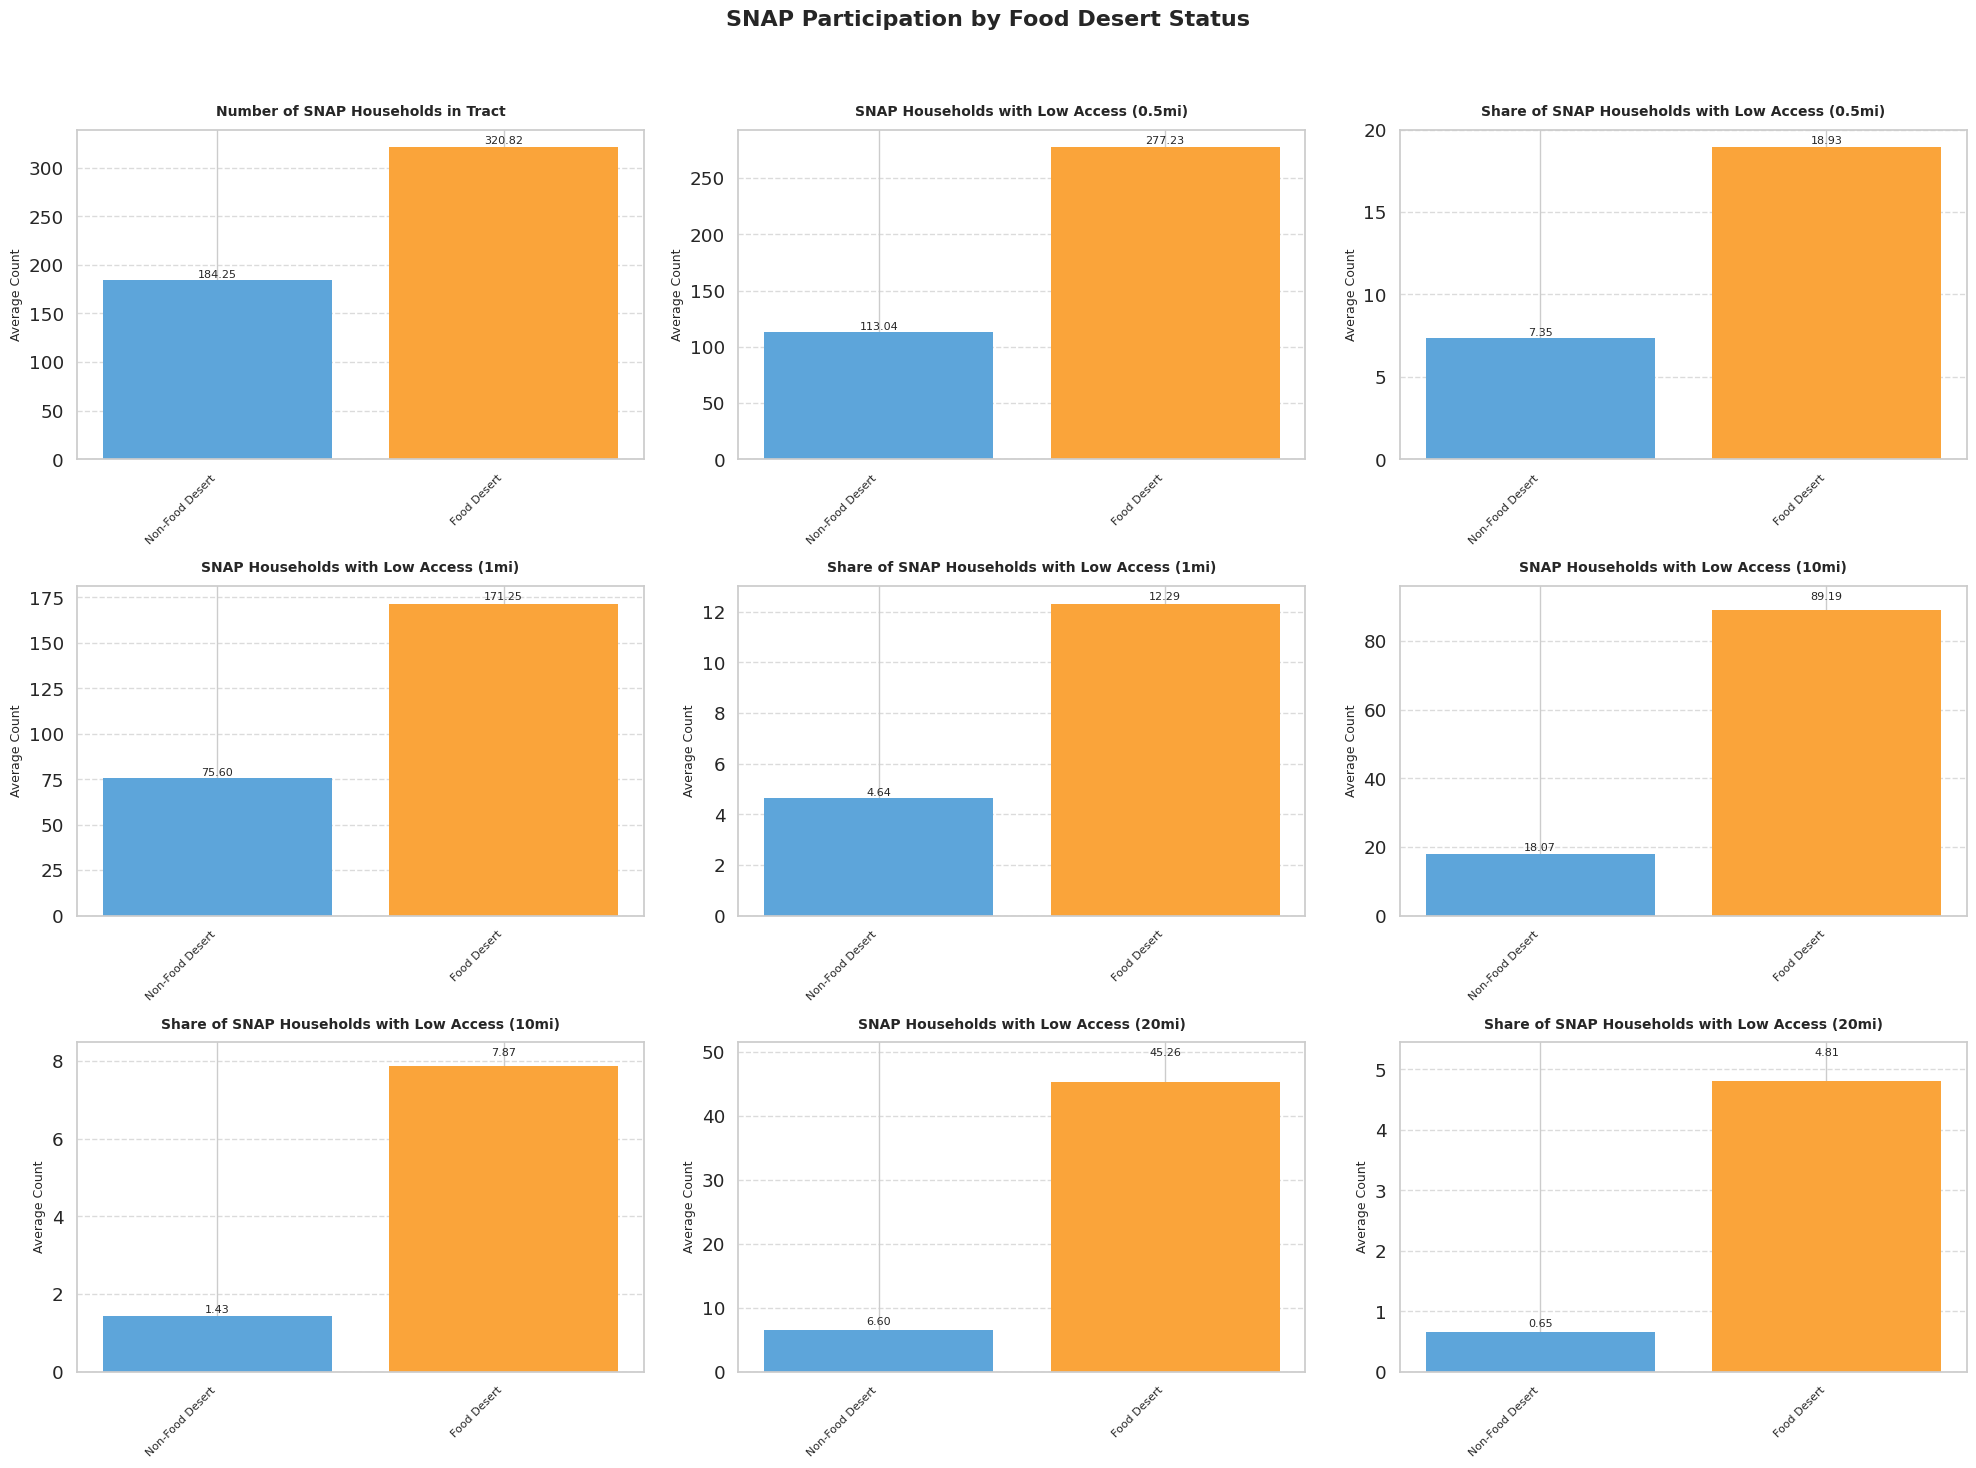

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# SNAP factors to analyze
snap_factors = [
    'TractSNAP', 'lasnaphalf', 'lasnaphalfshare',
    'lasnap1', 'lasnap1share',
    'lasnap10', 'lasnap10share',
    'lasnap20', 'lasnap20share'
]

# Detailed SNAP factor labels
snap_factor_labels = {
    'TractSNAP': 'Number of SNAP Households in Tract',
    'lasnaphalf': 'SNAP Households with Low Access (0.5mi)',
    'lasnaphalfshare': 'Share of SNAP Households with Low Access (0.5mi)',
    'lasnap1': 'SNAP Households with Low Access (1mi)',
    'lasnap1share': 'Share of SNAP Households with Low Access (1mi)',
    'lasnap10': 'SNAP Households with Low Access (10mi)',
    'lasnap10share': 'Share of SNAP Households with Low Access (10mi)',
    'lasnap20': 'SNAP Households with Low Access (20mi)',
    'lasnap20share': 'Share of SNAP Households with Low Access (20mi)'
}

# Prepare the plot
plt.figure(figsize=(20, 15), facecolor='white')
plt.suptitle('SNAP Participation by Food Desert Status', fontsize=16, fontweight='bold')

# Calculate number of rows and columns for subplots
n_factors = len(snap_factors)
n_cols = 3
n_rows = (n_factors + n_cols - 1) // n_cols

# Detailed summary statistics
print("SNAP Participation Summary Statistics:")
for factor in snap_factors:
    if factor in food_research_atlas.columns:
        print(f"\n{snap_factor_labels.get(factor, factor)}:")
        # Calculate summary statistics for each food desert status
        summary = food_research_atlas.groupby('is_food_desert')[factor].describe()

        print(summary.to_string())

# Create subplots for each SNAP factor
for i, factor in enumerate(snap_factors, 1):
    if factor in food_research_atlas.columns:
        # Create subplot
        ax = plt.subplot(n_rows, n_cols, i)

        # Group data by food desert status
        grouped_data = food_research_atlas.groupby('is_food_desert')[factor]

        # Calculate mean and standard error
        means = grouped_data.mean()
        errors = grouped_data.sem()

        # Prepare data for plotting
        labels = ['Non-Food Desert', 'Food Desert']
        x = np.arange(len(labels))

        # Create bar plot with error bars
        bars = ax.bar(x, means,
                      yerr=errors,
                      color=['#5DA5DA', '#FAA43A'],
                      edgecolor='none',  # Remove edge color
                      capsize=0,  # Remove cap lines
                      error_kw={'ecolor': 'black', 'alpha': 0})

        ax.set_title(snap_factor_labels.get(factor, factor), fontsize=10, fontweight='bold', pad=10)
        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
        ax.set_ylabel('Average Count', fontsize=9)

        for j, bar in enumerate(bars):
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2., height + errors[j],
                    f'{height:.2f}',
                    ha='center', va='bottom', fontsize=8)

        ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(top=0.9)

plt.show()

##Data Cleaning and Missing Value Handling
#####This section presents a complex strategy for managing missing values in the dataset, which is a keystone in generating reliable results in an analyses. This strategy recognizes different levels of missingness (low, moderate, and high), and applies different methods to each level of missingness.For the columns with low and moderate levels of missingness (<10%), the code uses median imputation to fill in the missing values while preserving the missingness distribution of the data. For the columns with high missingness, the strategy was more complex - we create a binary indicator flag to show where the values for each column were missing, and then we impute with 0 (which is appropriate in cases where a missing value likely indicates there is none rather than a value that cannot be measured).The implementation of this process includes a detailed validation process to ensure that the integrity of the data cleaning process maintains the integrity of the data. Each step identifies that no rows were lost throughout the processing, there no unintended data type changes, and through summary statistics we observe that the trends and distributions of the variables remains realistic pre- and post-imputation.This process is a detailed approach to missing data that ensures that no subsequent analyses are impacted by missing information or biased imputation across variables - especially in relation to the examination of socioeconomic factors which may have a systematic pattern to missingness.

In [72]:
# Comprehensive Missing Value Handling Strategy

import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

# Function to categorize and handle missing values
def handle_missing_values(df):
    # Create a copy of the dataframe to avoid modifying the original
    data = df.copy()

    # 1. Separate columns by missing value percentage
    total_rows = len(data)
    missing_percentages = data.isnull().mean() * 100

    # Categories of columns based on missing value percentage
    minimal_missing = missing_percentages[(missing_percentages > 0) & (missing_percentages < 1)].index.tolist()
    moderate_missing = missing_percentages[(missing_percentages >= 1) & (missing_percentages < 10)].index.tolist()
    high_missing = missing_percentages[missing_percentages >= 10].index.tolist()

    print("Columns with minimal missing values (impute with median):", minimal_missing)
    print("\nColumns with moderate missing values (impute with median):", moderate_missing)
    print("\nColumns with high missing values (special handling):", high_missing)

    # 2. Handling minimal missing columns (median imputation)
    for col in minimal_missing + moderate_missing:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(data[col]):
            # Median imputation
            median_value = data[col].median()
            data[col].fillna(median_value, inplace=True)
            print(f"\nImputed {col} with median: {median_value}")

    # 3. Handling high missing columns
    for col in high_missing:
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(data[col]):
            # Specialized handling for highly missing columns
            print(f"\nSpecial handling for {col}")

            # Option 1: Create a binary flag for missingness
            data[f'{col}_missing'] = data[col].isnull().astype(int)

            # Option 2: Impute with 0 or a very low value
            # This assumes missing might indicate absence or very low value
            data[col].fillna(0, inplace=True)

            print(f"Created missing flag {col}_missing")
            print(f"Filled {col} with 0")

    # 4. Verify missing values
    missing_after = data.isnull().sum()
    print("\nRemaining missing values:")
    print(missing_after[missing_after > 0])

    return data

# Apply the missing value handling
food_research_atlas_cleaned = handle_missing_values(food_research_atlas)

# Optional: Verify the results
print("\nOriginal DataFrame shape:", food_research_atlas.shape)
print("Cleaned DataFrame shape:", food_research_atlas_cleaned.shape)

# Additional validation
def validate_cleaning(original, cleaned):
    print("\nValidation Results:")

    # Check total rows preserved
    print(f"Original rows: {len(original)}")
    print(f"Cleaned rows: {len(cleaned)}")

    # Compare column types
    print("\nColumn Type Preservation:")
    for col in original.columns:
        if col in cleaned.columns:
            orig_type = original[col].dtype
            clean_type = cleaned[col].dtype
            if orig_type != clean_type:
                print(f"Type change in {col}: {orig_type} -> {clean_type}")

    # Compare summary statistics for numeric columns
    print("\nSummary Statistics Comparison:")
    numeric_cols = original.select_dtypes(include=[np.number]).columns
    for col in numeric_cols:
        if col in cleaned.columns:
            print(f"\n{col}:")
            print("Original:")
            print(original[col].describe())
            print("\nCleaned:")
            print(cleaned[col].describe())

# Run validation
validate_cleaning(food_research_atlas, food_research_atlas_cleaned)

Columns with minimal missing values (impute with median): ['NUMGQTRS', 'PCTGQTRS', 'PovertyRate', 'TractLOWI', 'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHispanic', 'TractHUNV', 'TractSNAP']

Columns with moderate missing values (impute with median): ['MedianFamilyIncome', 'lapophalf', 'lapophalfshare', 'lalowihalf', 'lalowihalfshare', 'lakidshalf', 'lakidshalfshare', 'laseniorshalf', 'laseniorshalfshare', 'lawhitehalf', 'lawhitehalfshare', 'lablackhalf', 'lablackhalfshare', 'laasianhalf', 'laasianhalfshare', 'lanhopihalf', 'lanhopihalfshare', 'laaianhalf', 'laaianhalfshare', 'laomultirhalf', 'laomultirhalfshare', 'lahisphalf', 'lahisphalfshare', 'lahunvhalf', 'lahunvhalfshare', 'lasnaphalf', 'lasnaphalfshare']

Columns with high missing values (special handling): ['LAPOP1_10', 'LAPOP05_10', 'LAPOP1_20', 'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20', 'lapop1', 'lapop1share', 'lalowi1', 'lalowi1share', 'lakids1', '

<ipython-input-72-48c775adf7f6>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(median_value, inplace=True)
<ipython-input-72-48c775adf7f6>:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 


Remaining missing values:
Series([], dtype: int64)

Original DataFrame shape: (72531, 150)
Cleaned DataFrame shape: (72531, 234)

Validation Results:
Original rows: 72531
Cleaned rows: 72531

Column Type Preservation:

Summary Statistics Comparison:

CensusTract:
Original:
count    7.253100e+04
mean     2.782573e+10
std      1.581647e+10
min      1.001020e+09
25%      1.212708e+10
50%      2.712979e+10
75%      4.103900e+10
max      5.604595e+10
Name: CensusTract, dtype: float64

Cleaned:
count    7.253100e+04
mean     2.782573e+10
std      1.581647e+10
min      1.001020e+09
25%      1.212708e+10
50%      2.712979e+10
75%      4.103900e+10
max      5.604595e+10
Name: CensusTract, dtype: float64

Urban:
Original:
count    72531.000000
mean         0.760626
std          0.426704
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: Urban, dtype: float64

Cleaned:
count    72531.000000
mean         0.760626
std          0.4267

##SNAP Distribution Visualization
#####This visualization utilizes violin plots to offer an in-depth view of SNAP household distributions for food desert census tracts and non-food desert census tracts. Rather than comparing averages in basic bar charts, this visualization reveals all of the shape of the distribution, reflecting central tendency, spread characteristics, and density overall. The width of each "violin" at each point depicts the probability density of the data at those values, giving an indication of how SNAP households are distributed across various types of census tracts. In addition, the box plots within the density curves show the median, interquartile range, and may show outliers, which provides additional descriptive statistics alongside the distribution visualization. The clear distinction in distributions displayed clearly show that food deserts generally have higher concentrations of SNAP households than non-food deserts. The Welch's t-test shows the significance of the difference (with a p-value annotated at the top of the chart) and provides statistical significance by taking into account group contribution to unequal variances. This analysis provides strong evidence that food desert status and SNAP household status are related, which may inform a need for policies to look at geographic food access in tandem with economically focused food access programs, such as SNAP, when addressing food insecurity.

<ipython-input-73-cc1dd28208d5>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


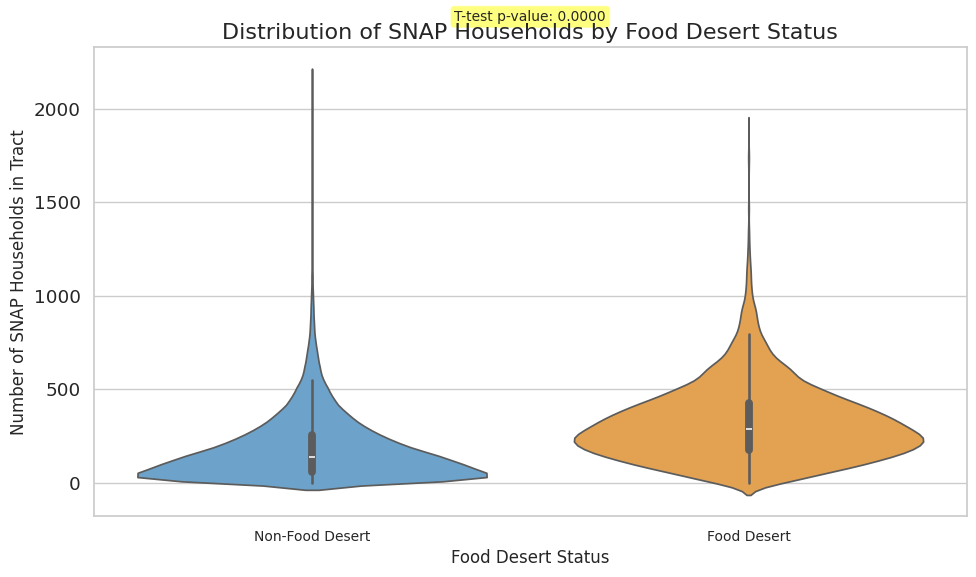


TractSNAP Summary Statistics:

Non-Food Desert Tracts:
count    63238.000000
mean       184.252538
std        176.087347
min          0.000000
25%         59.000000
50%        136.000000
75%        255.000000
max       2175.000000
Name: TractSNAP, dtype: float64

Food Desert Tracts:
count    9293.000000
mean      320.822017
std       205.068742
min         0.000000
25%       176.000000
50%       286.000000
75%       424.000000
max      1888.000000
Name: TractSNAP, dtype: float64

T-test statistic: 60.9808
P-value: 0.0000


In [73]:
# Violin Plot for TractSNAP by Food Desert Status
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure
plt.figure(figsize=(10, 6))

# Create violin plot
sns.violinplot(
    x='is_food_desert',
    y='TractSNAP',
    data=food_research_atlas_cleaned,
    palette=['#5DA5DA', '#FAA43A'],
    inner="box"  # Add a boxplot inside the violin plot
)

# Customize the plot
plt.title('Distribution of SNAP Households by Food Desert Status', fontsize=16)
plt.xlabel('Food Desert Status', fontsize=12)
plt.ylabel('Number of SNAP Households in Tract', fontsize=12)
plt.xticks([0, 1], ['Non-Food Desert', 'Food Desert'], fontsize=10)

# Add statistical test
from scipy import stats
food_desert = food_research_atlas_cleaned[food_research_atlas_cleaned['is_food_desert'] == 1]['TractSNAP']
non_food_desert = food_research_atlas_cleaned[food_research_atlas_cleaned['is_food_desert'] == 0]['TractSNAP']
t_stat, p_value = stats.ttest_ind(food_desert, non_food_desert, equal_var=False)

# Annotate p-value
plt.annotate(
    f'T-test p-value: {p_value:.4f}',
    xy=(0.5, 1.05),
    xycoords='axes fraction',
    ha='center',
    va='bottom',
    fontsize=10,
    bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5)
)

# Display summary statistics
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nTractSNAP Summary Statistics:")
print("\nNon-Food Desert Tracts:")
print(non_food_desert.describe())
print("\nFood Desert Tracts:")
print(food_desert.describe())
print(f"\nT-test statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")